In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns




from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.impute import KNNImputer



In [2]:
df = pd.read_csv("Sri Lankan CKD Dataset.csv")

In [3]:
df.head

<bound method NDFrame.head of       id   age  weight gender       cr       cru    al    gl     na    ca  \
0      1  72.0   52.00      M   249.43       NaN  34.9   NaN  142.0  2.43   
1      2  76.0   52.00      M   216.05       NaN  41.3   NaN  145.0  2.40   
2      3  60.0   80.40      M   155.40       NaN  33.7   NaN  135.0  2.00   
3      4  65.0   53.40      F   127.50       NaN  41.8   NaN  138.0  2.80   
4      5  59.0   60.40      M   172.71       NaN  39.7   NaN  128.0  2.20   
..   ...   ...     ...    ...      ...       ...   ...   ...    ...   ...   
401  402  48.0   48.00      M  1167.62       NaN   NaN   NaN  134.0   NaN   
402  403  46.0   55.00      M   211.20       NaN  37.2  37.9  144.0  2.40   
403  404  55.0   54.85      F   164.43  10302.37  22.2  48.9  129.0   NaN   
404  405  84.0   43.90      M   501.71       NaN   NaN   NaN  135.0   NaN   
405  406  38.0   60.50      M   880.64   3810.53  38.5  32.1  127.0   NaN   

       k     cl    pr  iron     ua   wbc   rb

In [4]:
df.isnull().sum().sum()

2769

In [5]:
for i in df.columns:
    print('Unique Values in "{}":\n'.format(i),df[i].unique(), "\n\n")

Unique Values in "id":
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 24

In [6]:
df['pr'].unique()

array([      nan, 1.160e+01, 8.900e+00, 1.090e+01, 7.770e+01, 7.530e+01,
       7.140e+01, 1.300e+00, 8.100e+00, 1.000e+00, 2.200e+00, 3.800e+00,
       5.460e+01, 5.300e+00, 2.200e+01, 7.120e+01, 8.260e+01, 8.430e+01,
       7.600e+00, 1.000e-01, 3.000e-01, 4.870e+01, 1.200e+00, 8.350e+01,
       5.870e+01, 7.410e+01, 6.620e+01, 7.110e+01, 6.490e+01, 8.700e+01,
       9.000e-01, 5.000e-01, 2.320e+01, 3.200e+00, 1.500e+00, 7.160e+01,
       1.700e+00, 3.900e+00, 3.800e+01, 6.440e+01, 7.370e+01, 6.100e+01,
       7.180e+01, 7.610e+01, 1.840e+01, 1.326e+01, 7.010e+01, 7.910e+01,
       7.130e+01, 6.930e+01, 5.800e+01, 6.000e-01, 5.240e+01, 5.740e+01,
       1.658e+02, 6.520e+01, 2.000e-01, 4.340e+01, 8.620e+01, 3.910e+01,
       4.900e+00, 1.753e+02, 6.650e+01, 7.510e+01, 7.060e+01])

In [7]:
a= {"M":1,"F":0}

df["gender"]=df["gender"].map(a)

In [8]:
df.head()

,id,age,weight,gender,cr,cru,al,gl,na,ca,k,cl,pr,iron,ua,wbc,rbc,hg,plt,class
0,1,72.0,52.0,1,249.43,NaN,34.9,NaN,142.0,2.43,5.0,113.0,NaN,NaN,415.8,NaN,NaN,NaN,NaN,1
1,2,76.0,52.0,1,216.05,NaN,41.3,NaN,145.0,2.40,4.7,114.0,NaN,13.0,NaN,9.85,3.44,11.3,356.0,1
2,3,60.0,80.4,1,155.40,NaN,33.7,NaN,135.0,2.00,4.2,103.0,11.6,12.0,NaN,9.24,4.60,8.4,329.0,1
3,4,65.0,53.4,0,127.50,NaN,41.8,NaN,138.0,2.80,4.4,100.0,NaN,NaN,290.7,9.87,4.32,11.7,364.0,1
4,5,59.0,60.4,1,172.71,NaN,39.7,NaN,128.0,2.20,3.6,91.0,NaN,NaN,367.8,8.93,4.82,13.8,214.0,1


In [9]:
df.isnull().sum()

id          0
age         1
weight      4
gender      0
cr         16
cru       380
al        199
gl        334
na         40
ca        315
k          39
cl        193
pr        330
iron      384
ua        382
wbc        40
rbc        43
hg         33
plt        36
class       0
dtype: int64

In [10]:
missing_values_per_row = df.isnull().sum(axis=1)

print("Number of Missing Values per Row:")
print(missing_values_per_row)

Number of Missing Values per Row:
0      8
1      4
2      3
3      4
4      4
      ..
401    7
402    3
403    3
404    7
405    1
Length: 406, dtype: int64


In [11]:
df = df.drop("cru",axis =1)
df = df.drop("ua",axis =1)
df = df.drop("iron",axis =1)

In [12]:
rows_per_missing_values = missing_values_per_row.value_counts().sort_index()

print("\nNumber of Rows for Each Count of Missing Values:")
print(rows_per_missing_values)


Number of Rows for Each Count of Missing Values:
1       1
2       8
3      23
4      25
5      54
6      47
7     124
8      69
9       9
10     19
11     13
12      3
13      1
14      2
15      8
dtype: int64


In [13]:
threshold = 10
filtered_data = df[missing_values_per_row <= threshold]

print("\nFiltered DataFrame:")
print(filtered_data)
filtered_data.shape



Filtered DataFrame:
      id   age  weight  gender       cr    al    gl     na    ca    k     cl  \
0      1  72.0   52.00       1   249.43  34.9   NaN  142.0  2.43  5.0  113.0   
1      2  76.0   52.00       1   216.05  41.3   NaN  145.0  2.40  4.7  114.0   
2      3  60.0   80.40       1   155.40  33.7   NaN  135.0  2.00  4.2  103.0   
3      4  65.0   53.40       0   127.50  41.8   NaN  138.0  2.80  4.4  100.0   
4      5  59.0   60.40       1   172.71  39.7   NaN  128.0  2.20  3.6   91.0   
..   ...   ...     ...     ...      ...   ...   ...    ...   ...  ...    ...   
401  402  48.0   48.00       1  1167.62   NaN   NaN  134.0   NaN  4.1   94.0   
402  403  46.0   55.00       1   211.20  37.2  37.9  144.0  2.40  4.3  105.0   
403  404  55.0   54.85       0   164.43  22.2  48.9  129.0   NaN  3.9   97.0   
404  405  84.0   43.90       1   501.71   NaN   NaN  135.0   NaN  5.7   99.0   
405  406  38.0   60.50       1   880.64  38.5  32.1  127.0   NaN  4.1   99.0   

       pr   wbc   

(379, 17)

# Filling with mean value

In [14]:
mean_values = filtered_data.mean()

x_mean = filtered_data.fillna(mean_values)

In [15]:
x_mean.isnull().sum()

id        0
age       0
weight    0
gender    0
cr        0
al        0
gl        0
na        0
ca        0
k         0
cl        0
pr        0
wbc       0
rbc       0
hg        0
plt       0
class     0
dtype: int64

In [49]:
mvc = df.isnull().sum(axis=1)

# Filter rows with less than 4 missing values
f_df = df[mvc < 6]
f_df.shape


(347, 17)

In [50]:
f_df = f_df.apply(lambda x: x.fillna(x.mean()), axis=0)

# Display the result
f_df

,id,age,weight,gender,cr,al,gl,na,ca,k,cl,pr,wbc,rbc,hg,plt,class
1,2,76.0,52.00,1,216.05,41.300000,34.797429,145.0,2.400000,4.7,114.0,39.621471,9.85,3.44,11.3,356.0,1
2,3,60.0,80.40,1,155.40,33.700000,34.797429,135.0,2.000000,4.2,103.0,11.600000,9.24,4.60,8.4,329.0,1
3,4,65.0,53.40,0,127.50,41.800000,34.797429,138.0,2.800000,4.4,100.0,39.621471,9.87,4.32,11.7,364.0,1
4,5,59.0,60.40,1,172.71,39.700000,34.797429,128.0,2.200000,3.6,91.0,39.621471,8.93,4.82,13.8,214.0,1
5,6,47.0,43.00,0,189.07,37.173061,34.797429,143.0,2.179167,5.5,110.0,39.621471,7.74,2.80,8.2,244.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,402,48.0,48.00,1,1167.62,37.173061,34.797429,134.0,2.179167,4.1,94.0,39.621471,5.43,4.18,13.5,146.0,1
402,403,46.0,55.00,1,211.20,37.200000,37.900000,144.0,2.400000,4.3,105.0,75.100000,6.56,4.71,14.1,217.0,1
403,404,55.0,54.85,0,164.43,22.200000,48.900000,129.0,2.179167,3.9,97.0,71.100000,5.92,2.67,8.7,79.0,1
404,405,84.0,43.90,1,501.71,37.173061,34.797429,135.0,2.179167,5.7,99.0,39.621471,5.07,4.53,12.8,179.0,1


In [51]:
# sets_of_df = [f_df.iloc[i:i+11] for i in range(0, len(f_df), 11)]

# # Create separate DataFrames
# f_df1, f_df2, f_df3, f_df4 = sets_of_df

# # Display the results
# print("DataFrame 1:")
# print(f_df1)

# print("\nDataFrame 2:")
# print(f_df2)

# print("\nDataFrame 3:")
# print(f_df3)

# print("\nDataFrame 4:")
# print(f_df4)

In [57]:
columns_to_eliminate = ['age', 'weight','cr','al']  # Replace with your actual column names
elimination_percentage = 70  # Adjust this percentage based on your requirement

# Create a copy of df1 to avoid modifying the original DataFrame
f_df_e = f_df.copy()

# Randomly eliminate values in specified columns
for column in columns_to_eliminate:
    # Randomly select indices to eliminate
    random_indices = np.random.choice(f_df_e.index, size=int(len(f_df_e) * elimination_percentage / 100), replace=False)
    
    # Set selected values to NaN
    f_df_e.loc[random_indices, column] = np.nan

# Display the original and modified DataFrames
print("Original DataFrame (f_df):")
print(f_df)

print("\nModified DataFrame (f_df_e):")
print(f_df_e)


f_df_e

Original DataFrame (f_df):
      id   age  weight  gender       cr         al         gl     na  \
1      2  76.0   52.00       1   216.05  41.300000  34.797429  145.0   
2      3  60.0   80.40       1   155.40  33.700000  34.797429  135.0   
3      4  65.0   53.40       0   127.50  41.800000  34.797429  138.0   
4      5  59.0   60.40       1   172.71  39.700000  34.797429  128.0   
5      6  47.0   43.00       0   189.07  37.173061  34.797429  143.0   
..   ...   ...     ...     ...      ...        ...        ...    ...   
401  402  48.0   48.00       1  1167.62  37.173061  34.797429  134.0   
402  403  46.0   55.00       1   211.20  37.200000  37.900000  144.0   
403  404  55.0   54.85       0   164.43  22.200000  48.900000  129.0   
404  405  84.0   43.90       1   501.71  37.173061  34.797429  135.0   
405  406  38.0   60.50       1   880.64  38.500000  32.100000  127.0   

           ca    k     cl         pr   wbc   rbc    hg    plt  class  
1    2.400000  4.7  114.0  39.621471 

,id,age,weight,gender,cr,al,gl,na,ca,k,cl,pr,wbc,rbc,hg,plt,class
1,2,NaN,52.00,1,216.05,NaN,34.797429,145.0,2.400000,4.7,114.0,39.621471,9.85,3.44,11.3,356.0,1
2,3,NaN,NaN,1,NaN,33.7,34.797429,135.0,2.000000,4.2,103.0,11.600000,9.24,4.60,8.4,329.0,1
3,4,NaN,NaN,0,NaN,41.8,34.797429,138.0,2.800000,4.4,100.0,39.621471,9.87,4.32,11.7,364.0,1
4,5,NaN,60.40,1,NaN,39.7,34.797429,128.0,2.200000,3.6,91.0,39.621471,8.93,4.82,13.8,214.0,1
5,6,NaN,43.00,0,NaN,NaN,34.797429,143.0,2.179167,5.5,110.0,39.621471,7.74,2.80,8.2,244.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,402,NaN,48.00,1,1167.62,NaN,34.797429,134.0,2.179167,4.1,94.0,39.621471,5.43,4.18,13.5,146.0,1
402,403,46.0,55.00,1,NaN,37.2,37.900000,144.0,2.400000,4.3,105.0,75.100000,6.56,4.71,14.1,217.0,1
403,404,55.0,54.85,0,NaN,NaN,48.900000,129.0,2.179167,3.9,97.0,71.100000,5.92,2.67,8.7,79.0,1
404,405,84.0,NaN,1,NaN,NaN,34.797429,135.0,2.179167,5.7,99.0,39.621471,5.07,4.53,12.8,179.0,1


In [116]:
# import pandas as pd
# from sklearn.impute import KNNImputer
# from sklearn.metrics import mean_squared_error

# # Assuming f_df and f_df_e are your DataFrames
# # Replace this with your actual DataFrames
# # Example:
# # f_df = pd.read_csv('your_dataset.csv')
# # f_df_e = ...

# # Specify k values
# k_values = range(2, 20)

# # Initialize a list to store results
# results = []

# # Initialize a DataFrame to store MSE for each column for k=3
# mse_for_k_3 = pd.DataFrame(columns=f_df.columns)

# # Iterate over different k values
# for k in k_values:
#     # Initialize KNN imputer
#     imputer = KNNImputer(n_neighbors=k)
    
#     # Impute missing values in f_df_e
#     imputed_f_df_e = pd.DataFrame(imputer.fit_transform(f_df_e), columns=f_df_e.columns)
    
#     # Calculate MSE for each column between imputed_f_df_e and f_df for the current k
#     column_mses = {}
#     for column in f_df.columns:
#         mse_column = mean_squared_error(f_df[column].fillna(0), imputed_f_df_e[column])
#         column_mses[column] = mse_column
    
#     # Store results
#     results.append({'k': k, 'column_mses': column_mses})
    
#     # If k is 6, store MSE values for each column separately
#     if k == 6:
#         mse_for_k_3 = pd.DataFrame.from_dict(column_mses, orient='index', columns=['MSE for k=6'])

# # Create a DataFrame from the results
# results_df = pd.DataFrame(results)

# # Calculate average MSE for each k value
# results_df['average_mse'] = results_df['column_mses'].apply(lambda x: np.mean(list(x.values())))

# # Rank k values based on average MSE
# ranked_k_values = results_df.sort_values(by='average_mse')

# # Display results
# print("Results for Different K Values:")
# print(results_df)

# print("\nRanked K Values based on Average MSE:")
# print(ranked_k_values)

# # Print MSE for each column for k=3
# print("\nMSE for each column for k=6:")
# print(mse_for_k_3)

# # Full calculation of MSE for column "cr" for k=10
# column_for_mse = "cr"
# k_for_mse = 6
# imputer_for_mse = KNNImputer(n_neighbors=k_for_mse)
# imputed_f_df_e_for_mse = pd.DataFrame(imputer_for_mse.fit_transform(f_df_e), columns=f_df_e.columns)
# mse_for_column = mean_squared_error(f_df[column_for_mse].fillna(0), imputed_f_df_e_for_mse[column_for_mse])
# print(f"\nFull Calculation of MSE for column '{column_for_mse}' for k={k_for_mse}:\n")
# print("Original values in f_df['cr']:")
# print(f_df[column_for_mse].fillna(0))
# print("\nImputed values in f_df_e['cr']:")
# print(imputed_f_df_e_for_mse[column_for_mse])
# print("\nMean Squared Error (MSE) for column 'weight':", mse_for_column)


In [86]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

# Assuming f_df and f_df_e are your DataFrames
# Replace this with your actual DataFrames
# Example:
# f_df = pd.read_csv('your_dataset.csv')
# f_df_e = ...

# Specify k values
k_values = range(2, 20)

# Initialize a list to store results
results = []

# Initialize a DataFrame to store MSE for each column for k=14
mse_for_k_14 = pd.DataFrame(columns=f_df.columns)

# Iterate over different k values
for k in k_values:
    # Initialize KNN imputer
    imputer = KNNImputer(n_neighbors=k)
    
    # Impute missing values in f_df_e
    imputed_f_df_e = pd.DataFrame(imputer.fit_transform(f_df_e), columns=f_df_e.columns)
    
    # Calculate MSE for each column between imputed_f_df_e and f_df for the current k
    column_mses = {}
    for column in f_df.columns:
        mse_column = mean_squared_error(f_df[column].fillna(0), imputed_f_df_e[column])
        column_mses[column] = mse_column
    
    # Store results
    results.append({'k': k, 'column_mses': column_mses})
    
    # If k is 14, store MSE values for each column separately
    if k == 14:
        mse_for_k_14 = pd.DataFrame.from_dict(column_mses, orient='index', columns=['MSE for k=14'])
        imputed_f_df_e_for_k_14 = imputed_f_df_e.copy()  # Store imputed DataFrame for k=14

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Calculate average MSE for each k value
results_df['average_mse'] = results_df['column_mses'].apply(lambda x: np.mean(list(x.values())))

# Rank k values based on average MSE
ranked_k_values = results_df.sort_values(by='average_mse')

# Display the desired output
desired_output = ranked_k_values.head(20)[['k', 'average_mse']]
print(desired_output)

# Display DataFrame for k=14
print("\nDataFrame for k=14 (imputed_f_df_e_for_k_14):")
print(imputed_f_df_e_for_k_14)


     k  average_mse
12  14  2917.458606
17  19  2928.055410
13  15  2932.589428
14  16  2946.619922
11  13  2948.479735
8   10  2955.635456
15  17  2970.039470
16  18  2980.046707
10  12  2984.578821
7    9  2985.467397
6    8  2989.190651
9   11  2997.201792
5    7  3069.157850
4    6  3417.408657
3    5  3613.568311
2    4  3781.388429
1    3  3963.681337
0    2  4273.868790

DataFrame for k=14 (imputed_f_df_e_for_k_14):
        id        age     weight  gender           cr         al         gl  \
0      2.0  60.857143  52.000000     1.0   216.050000  37.463178  34.797429   
1      3.0  58.071429  57.353571     1.0   262.115000  33.700000  34.797429   
2      4.0  56.000000  56.314286     0.0   263.389286  41.800000  34.797429   
3      5.0  56.214286  60.400000     1.0   190.187143  39.700000  34.797429   
4      6.0  58.857143  43.000000     0.0   182.618571  36.996968  34.797429   
..     ...        ...        ...     ...          ...        ...        ...   
342  402.0  53.28571

In [59]:
# import pandas as pd
# from sklearn.impute import KNNImputer
# from sklearn.metrics import mean_squared_error

# # Assuming f_df and f_df_e are your DataFrames
# # Replace this with your actual DataFrames
# # Example:
# # f_df = pd.read_csv('your_dataset.csv')
# # f_df_e = ...

# # Specify k values
# k_values = range(2, 30)

# # Initialize a list to store results
# results = []

# # Initialize a DataFrame to store MSE for each column for k=10
# mse_for_k_10 = pd.DataFrame(columns=f_df.columns)

# # Iterate over different k values
# for k in k_values:
#     # Initialize KNN imputer
#     imputer = KNNImputer(n_neighbors=k)
    
#     # Impute missing values in f_df_e
#     imputed_f_df_e = pd.DataFrame(imputer.fit_transform(f_df_e), columns=f_df_e.columns)
    
#     # Calculate MSE for each column between imputed_f_df_e and f_df for the current k
#     column_mses = {}
#     for column in f_df.columns:
#         mse_column = mean_squared_error(f_df[column].fillna(0), imputed_f_df_e[column])
#         column_mses[column] = mse_column
    
#     # Store results
#     results.append({'k': k, 'column_mses': column_mses})
    
#     # If k is 10, store imputed DataFrame separately
#     if k == 10:
#         imputed_f_df_e_for_k_10 = imputed_f_df_e.copy()
    
#     # If k is 10, store MSE values for each column separately
#     if k == 10:
#         mse_for_k_10 = pd.DataFrame.from_dict(column_mses, orient='index', columns=['MSE for k=10'])

# # Create a DataFrame from the results
# results_df = pd.DataFrame(results)

# # Calculate average MSE for each k value
# results_df['average_mse'] = results_df['column_mses'].apply(lambda x: np.mean(list(x.values())))

# # Rank k values based on average MSE
# ranked_k_values = results_df.sort_values(by='average_mse')

# # Display results
# print("Results for Different K Values:")
# print(results_df)

# print("\nRanked K Values based on Average MSE:")
# print(ranked_k_values)

# # Print MSE for each column for k=10
# print("\nMSE for each column for k=10:")
# print(mse_for_k_10)

# # Full calculation of MSE for column "cr" for k=10
# column_for_mse = "cr"
# k_for_mse = 10
# imputer_for_mse = KNNImputer(n_neighbors=k_for_mse)
# imputed_f_df_e_for_mse = pd.DataFrame(imputer_for_mse.fit_transform(f_df_e), columns=f_df_e.columns)
# mse_for_column = mean_squared_error(f_df[column_for_mse].fillna(0), imputed_f_df_e_for_mse[column_for_mse])
# print(f"\nFull Calculation of MSE for column '{column_for_mse}' for k={k_for_mse}:\n")
# print("Original values in f_df['cr']:")
# print(f_df[column_for_mse].fillna(0))
# print("\nImputed values in f_df_e['cr']:")
# print(imputed_f_df_e_for_mse[column_for_mse])
# print("\nMean Squared Error (MSE) for column 'cr':", mse_for_column)

# # Access imputed DataFrame for k=10 separately
# print("\nImputed DataFrame for k=10:")
# print(imputed_f_df_e_for_k_10)


In [63]:
import pandas as pd
from sklearn.metrics import mean_squared_error

# Assuming f_df is your DataFrame
# Replace this with your actual DataFrame
# Example:
# f_df = pd.read_csv('your_dataset.csv')

# Impute missing values with mean values
imputed_f_df_mean = f_df_e.fillna(f_df_e.mean())

# Calculate MSE for each column between imputed_f_df_mean and f_df
column_mses_mean = {}
for column in f_df.columns:
    mse_column_mean = mean_squared_error(f_df[column].fillna(0), imputed_f_df_mean[column])
    column_mses_mean[column] = mse_column_mean

# Create a DataFrame for MSE values with mean imputation
mse_for_mean = pd.DataFrame.from_dict(column_mses_mean, orient='index', columns=['MSE for Mean Imputation'])

# Display results
print("MSE for each column with Mean Imputation:")
print(mse_for_mean)


# Calculate the average MSE for mean imputation
average_mse_mean = mse_for_mean.mean().values[0]

# Display the average MSE for mean imputation
print("Average MSE for Mean Imputation:", average_mse_mean)




# Choose the column for comparison
column_for_comparison = "cr"

# Extract the original values in the selected column
original_values = f_df[column_for_comparison]

# Impute missing values with mean values for the selected column
imputed_values_mean = f_df_e[column_for_comparison].fillna(f_df_e[column_for_comparison].mean())

# Display the original and imputed values for the selected column
comparison_df = pd.DataFrame({column_for_comparison: original_values, 'Imputed (Mean)': imputed_values_mean})

# Print the comparison
print("Comparison between Original and Imputed (Mean) Values for Column:", column_for_comparison)
print(comparison_df)


MSE for each column with Mean Imputation:
        MSE for Mean Imputation
id                     0.000000
age                  136.134962
weight                79.571369
gender                 0.000000
cr                 63042.502112
al                    20.761015
gl                     0.000000
na                     0.000000
ca                     0.000000
k                      0.000000
cl                     0.000000
pr                     0.000000
wbc                    0.000000
rbc                    0.000000
hg                     0.000000
plt                    0.000000
class                  0.000000
Average MSE for Mean Imputation: 3722.2923210623417
Comparison between Original and Imputed (Mean) Values for Column: cr
          cr  Imputed (Mean)
1     216.05      216.050000
2     155.40      306.218877
3     127.50      306.218877
4     172.71      306.218877
5     189.07      306.218877
..       ...             ...
401  1167.62     1167.620000
402   211.20      306.218877


In [56]:
filtered_data

,id,age,weight,gender,cr,al,gl,na,ca,k,cl,pr,wbc,rbc,hg,plt,class
0,1,72.0,52.00,1,249.43,34.9,NaN,142.0,2.43,5.0,113.0,NaN,NaN,NaN,NaN,NaN,1
1,2,76.0,52.00,1,216.05,41.3,NaN,145.0,2.40,4.7,114.0,NaN,9.85,3.44,11.3,356.0,1
2,3,60.0,80.40,1,155.40,33.7,NaN,135.0,2.00,4.2,103.0,11.6,9.24,4.60,8.4,329.0,1
3,4,65.0,53.40,0,127.50,41.8,NaN,138.0,2.80,4.4,100.0,NaN,9.87,4.32,11.7,364.0,1
4,5,59.0,60.40,1,172.71,39.7,NaN,128.0,2.20,3.6,91.0,NaN,8.93,4.82,13.8,214.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,402,48.0,48.00,1,1167.62,NaN,NaN,134.0,NaN,4.1,94.0,NaN,5.43,4.18,13.5,146.0,1
402,403,46.0,55.00,1,211.20,37.2,37.9,144.0,2.40,4.3,105.0,75.1,6.56,4.71,14.1,217.0,1
403,404,55.0,54.85,0,164.43,22.2,48.9,129.0,NaN,3.9,97.0,71.1,5.92,2.67,8.7,79.0,1
404,405,84.0,43.90,1,501.71,NaN,NaN,135.0,NaN,5.7,99.0,NaN,5.07,4.53,12.8,179.0,1


In [65]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=14)

x_1 = pd.DataFrame(knn_imputer.fit_transform(filtered_data), columns=filtered_data.columns)
x_1.isnull().sum()

id        0
age       0
weight    0
gender    0
cr        0
al        0
gl        0
na        0
ca        0
k         0
cl        0
pr        0
wbc       0
rbc       0
hg        0
plt       0
class     0
dtype: int64

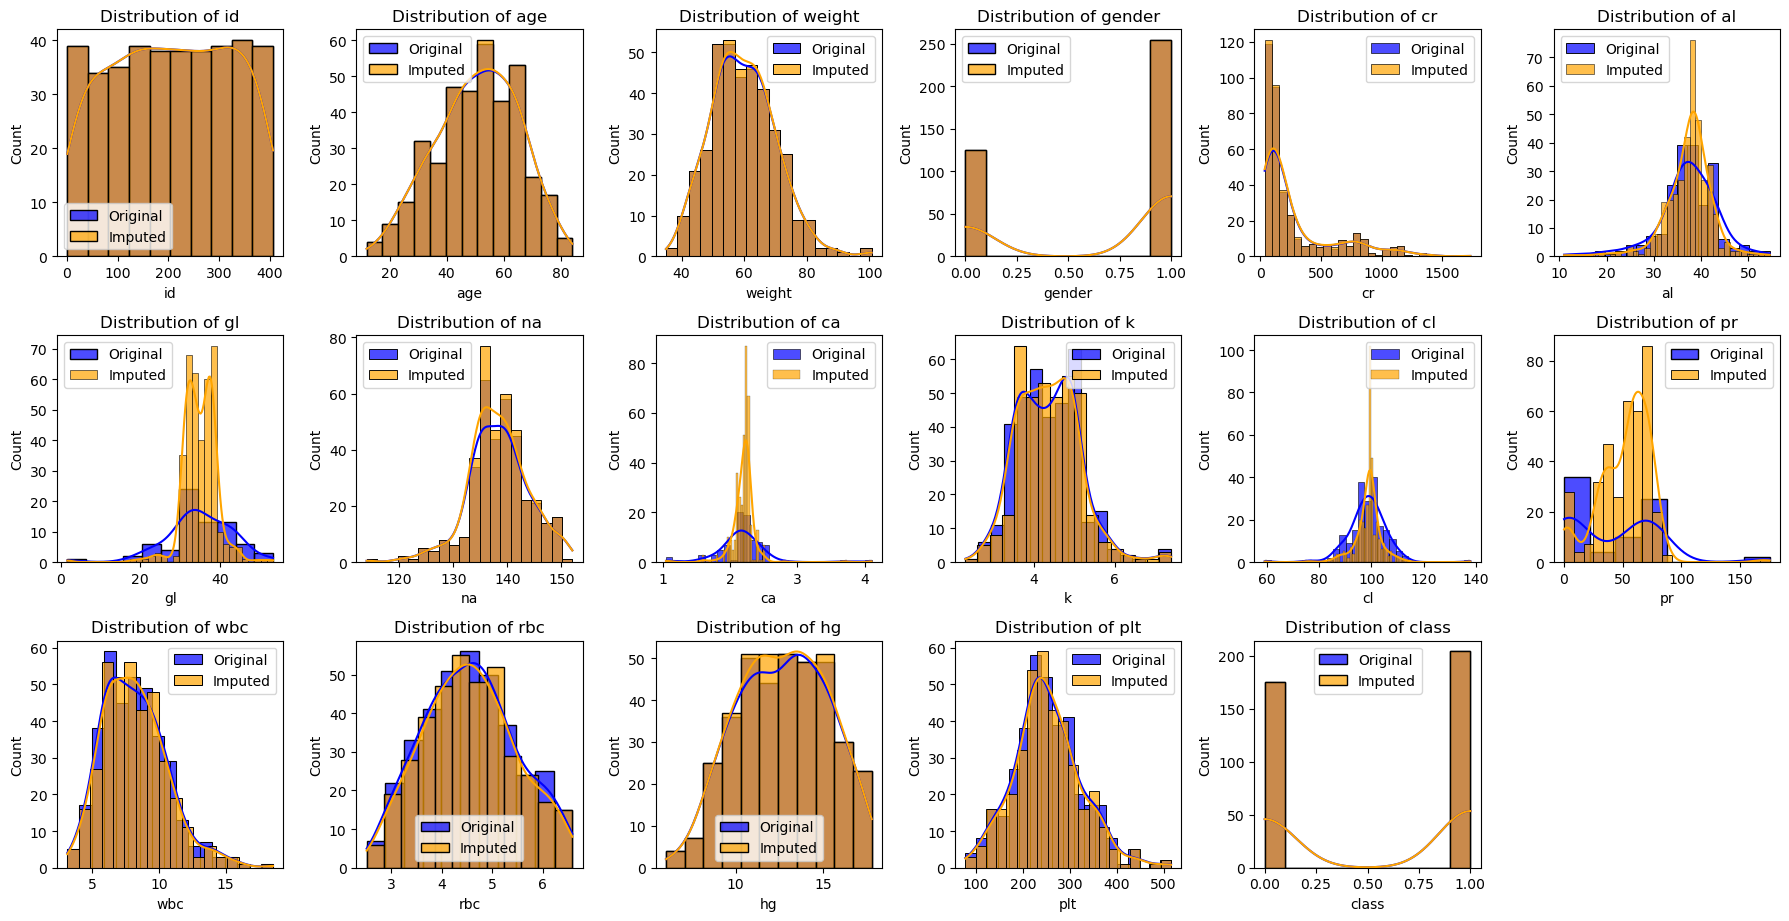

In [66]:
plt.figure(figsize=(18, 15))

for i, feature in enumerate(filtered_data.columns):
    plt.subplot(5, 6, i + 1)
    sns.histplot(filtered_data[feature], kde=True, color='blue', label='Original', alpha=0.7)
    sns.histplot(x_1[feature], kde=True, color='orange', label='Imputed', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

In [67]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=19)

x_2 = pd.DataFrame(knn_imputer.fit_transform(filtered_data), columns=filtered_data.columns)
x_2.isnull().sum()

id        0
age       0
weight    0
gender    0
cr        0
al        0
gl        0
na        0
ca        0
k         0
cl        0
pr        0
wbc       0
rbc       0
hg        0
plt       0
class     0
dtype: int64

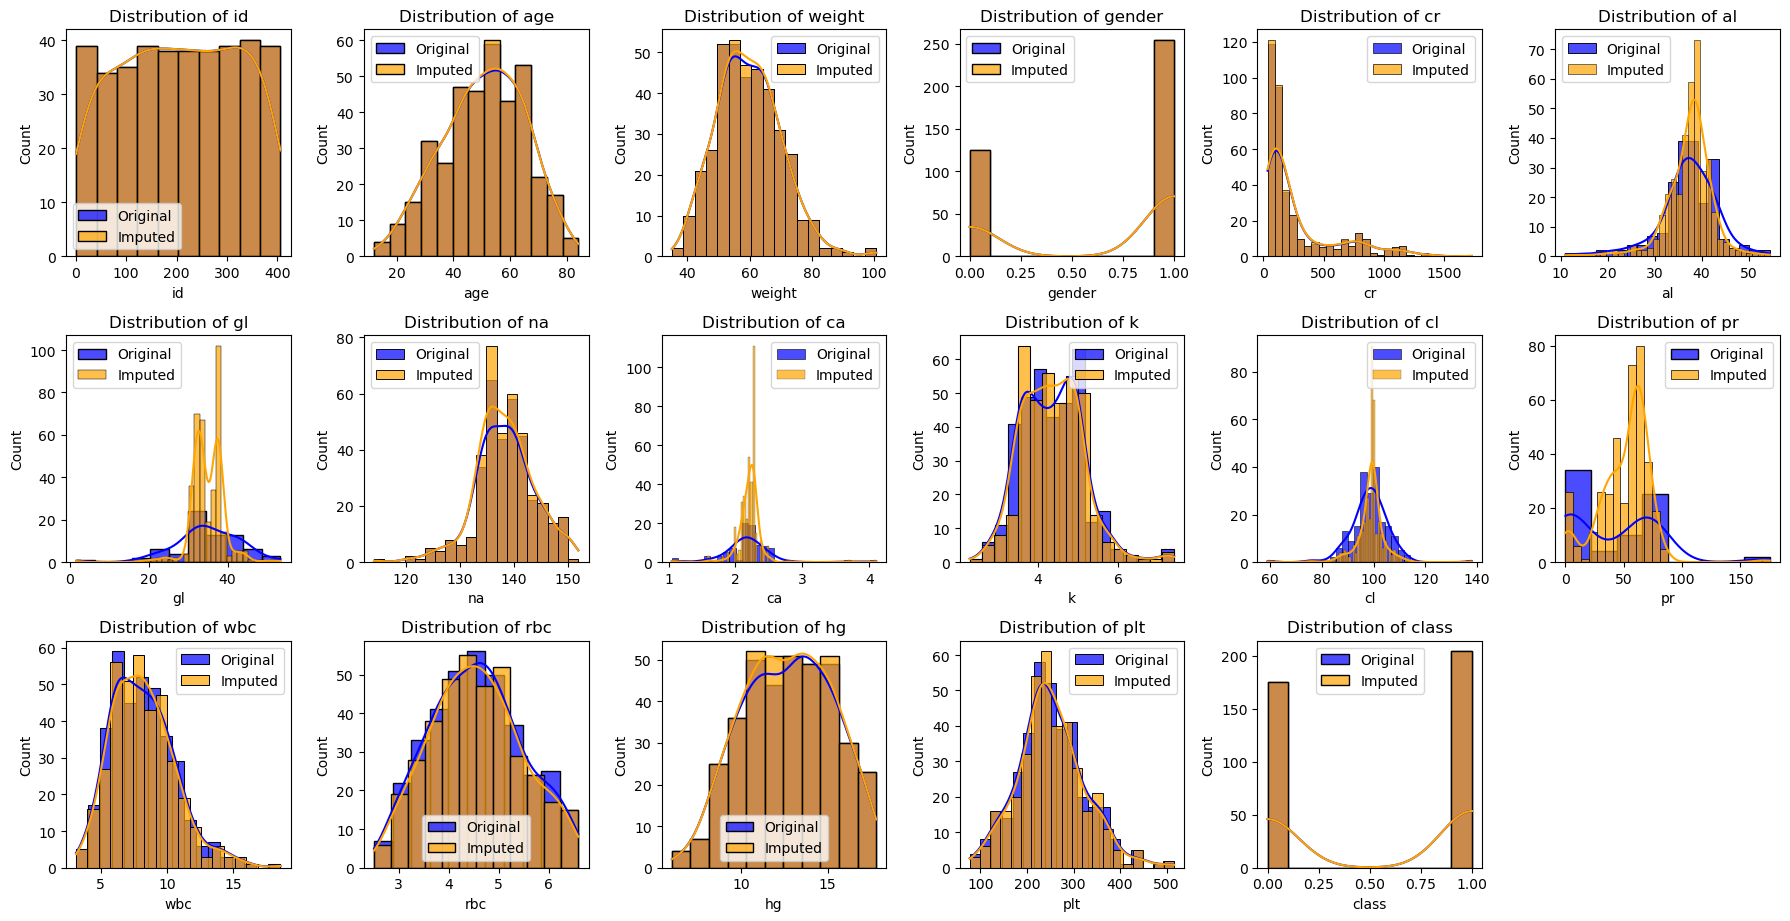

In [68]:
plt.figure(figsize=(18, 15))

for i, feature in enumerate(filtered_data.columns):
    plt.subplot(5, 6, i + 1)
    sns.histplot(filtered_data[feature], kde=True, color='blue', label='Original', alpha=0.7)
    sns.histplot(x_2[feature], kde=True, color='orange', label='Imputed', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

In [69]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=15)

x_3 = pd.DataFrame(knn_imputer.fit_transform(filtered_data), columns=filtered_data.columns)
x_3.isnull().sum()

id        0
age       0
weight    0
gender    0
cr        0
al        0
gl        0
na        0
ca        0
k         0
cl        0
pr        0
wbc       0
rbc       0
hg        0
plt       0
class     0
dtype: int64

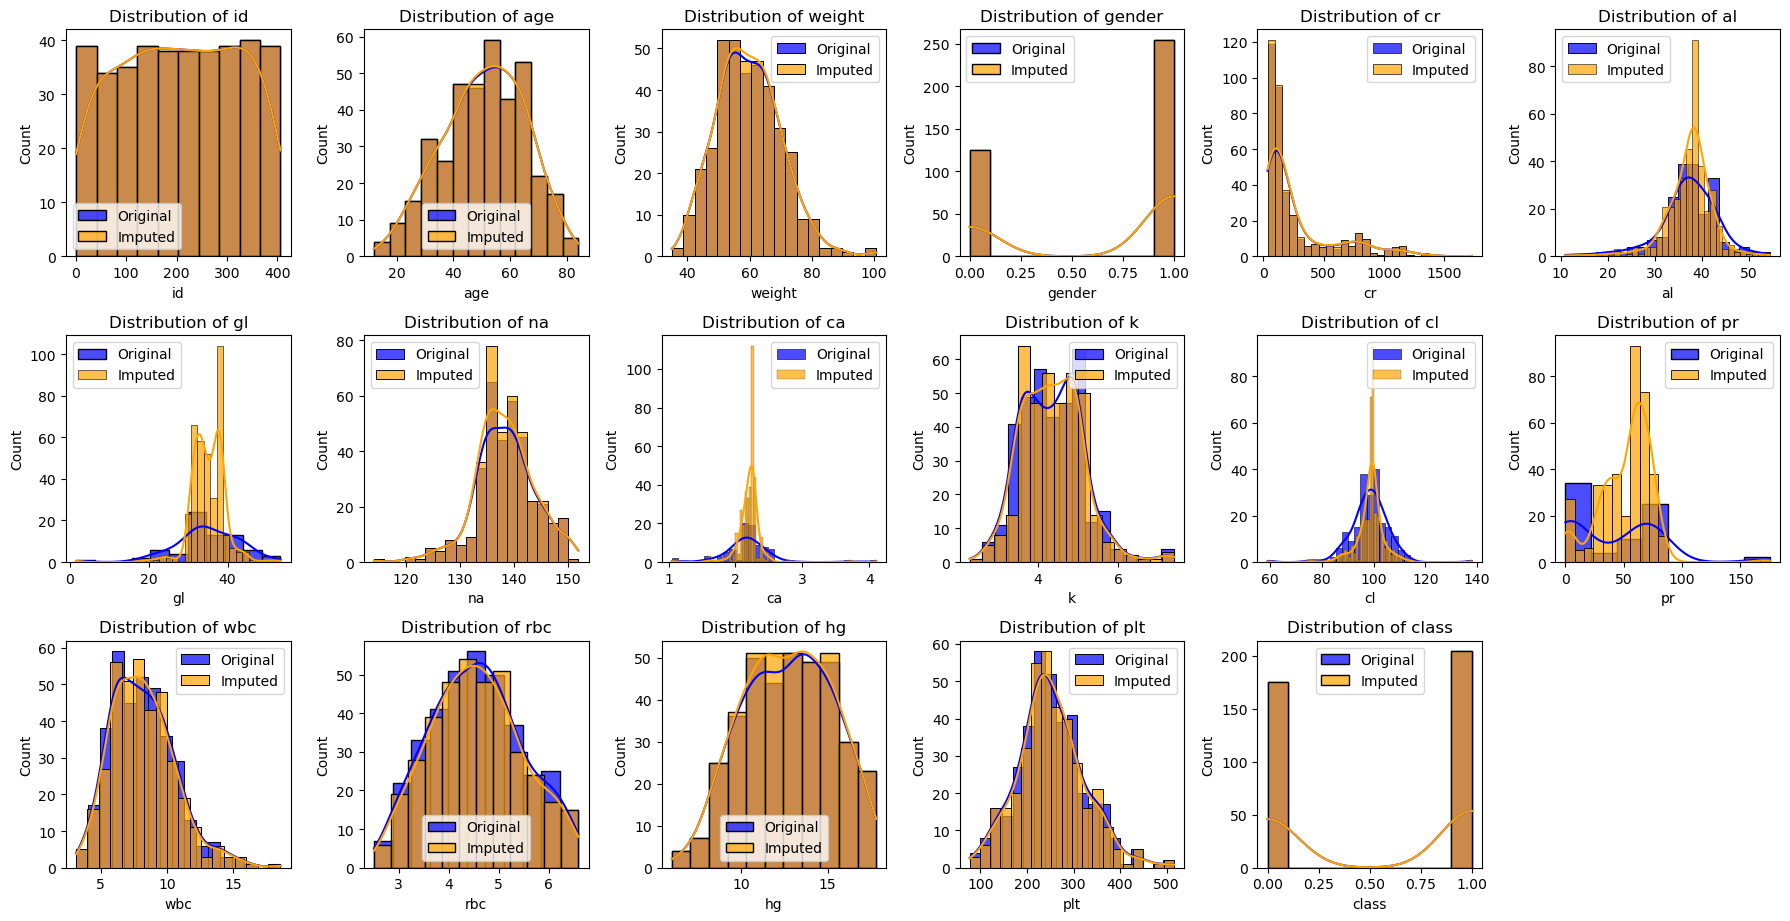

In [70]:
plt.figure(figsize=(18, 15))

for i, feature in enumerate(filtered_data.columns):
    plt.subplot(5, 6, i + 1)
    sns.histplot(filtered_data[feature], kde=True, color='blue', label='Original', alpha=0.7)
    sns.histplot(x_3[feature], kde=True, color='orange', label='Imputed', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

In [72]:
# from sklearn.metrics import mean_squared_error

# column_name = 'age'

# # Check if the specified column exists in both DataFrames
# if column_name in x_1.columns and column_name in x_2.columns:
#     # Extract the specified column from each DataFrame
#     column_df1 = x_1[column_name]
#     column_df2 = x_2[column_name]

#     # Calculate the mean squared error
#     mse = mean_squared_error(column_df1, column_df2)

#     print(f"Mean Squared Error between {column_name} in df1 and df2: {mse}")
# else:
#     print(f"Column {column_name} not found in both DataFrames.")


In [73]:
x_1.shape

(379, 17)

Variance of k: 0.6172903564829747


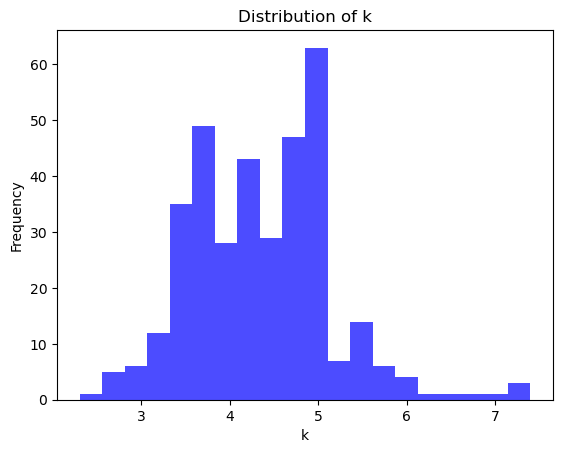

In [74]:


# Step 2: Choose the column for which you want to calculate the variance
column_name = 'k'

# Calculate the variance
variance = f_df[column_name].var()
print(f"Variance of {column_name}: {variance}")

# Step 3: Plot the data
# Plot a histogram to visualize the distribution
plt.hist(filtered_data[column_name], bins=20, color='blue', alpha=0.7)
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()


In [87]:
import pandas as pd

# Assuming you have both f_df and imputed_f_df_e_for_k_10 loaded

# Initialize an empty dictionary to store average differences for each column
average_differences = {}

# Loop through all columns
for column_name in f_df.columns:
    # Subtract corresponding values in the same row and calculate the average absolute difference
    differences = f_df[column_name] - imputed_f_df_e_for_k_14[column_name]
    average_difference = differences.abs().mean()
    
    # Store the result in the dictionary
    average_differences[column_name] = average_difference

# Display average differences for each column
for column_name, avg_diff in average_differences.items():
    print(f"Average Difference in {column_name}: {avg_diff}")


Average Difference in id: 36.97966101694915
Average Difference in age: 12.700968523002421
Average Difference in weight: 9.33168361417206
Average Difference in gender: 0.4271186440677966
Average Difference in cr: 231.0745850808041
Average Difference in al: 3.1305879329940205
Average Difference in gl: 2.2260774818401936
Average Difference in na: 5.773507629603857
Average Difference in ca: 0.09694350282485875
Average Difference in k: 0.8789462696953128
Average Difference in cl: 4.426318030832126
Average Difference in pr: 11.549787637088736
Average Difference in wbc: 2.5952509062408153
Average Difference in rbc: 0.8638282287640004
Average Difference in hg: 2.47864406779661
Average Difference in plt: 79.22033898305085
Average Difference in class: 0.31186440677966104


Variance of id: 13364.321383951623
Variance of age: 196.6307678171673
Variance of weight: 111.05626292981002
Variance of gender: 0.21498892239009815
Variance of cr: 103743.09534218056
Variance of al: 23.7165923793795
Variance of gl: 13.94541022295624
Variance of na: 31.178885630498534
Variance of ca: 0.03602728805394989
Variance of k: 0.6172903564829747
Variance of cl: 30.49193946611671
Variance of pr: 256.45434755185306
Variance of wbc: 6.004231839520202
Variance of rbc: 0.8446033101781422
Variance of hg: 6.718187126198676
Variance of plt: 5308.458313204852
Variance of class: 0.24845496493478392


C:\Users\V A S E E K A R A N\AppData\Local\Temp\ipykernel_12520\818742175.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout for better spacing


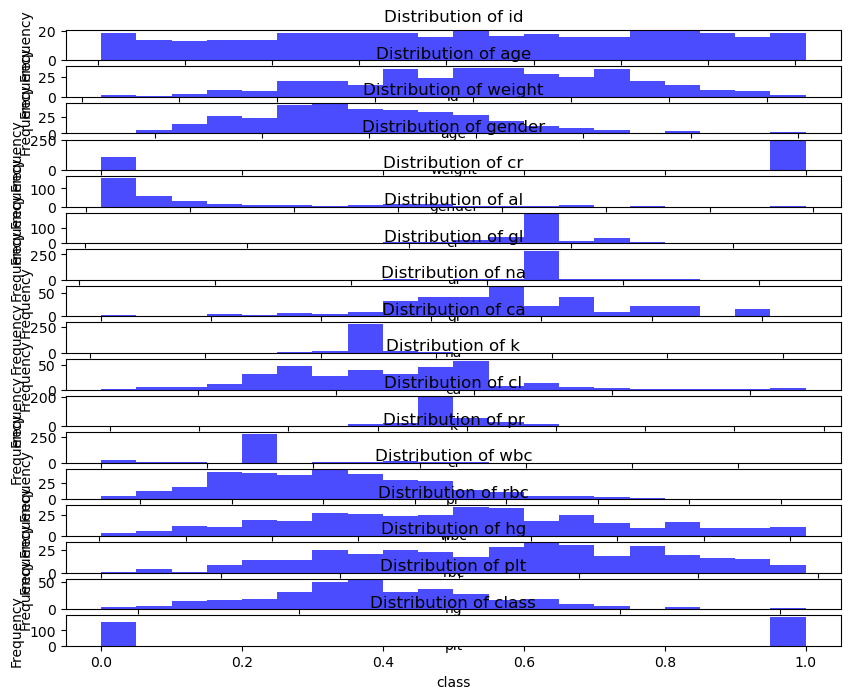

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have f_df loaded

# Set the figure size to accommodate all subplots
plt.figure(figsize=(10, 8))

# Initialize a counter for subplots
subplot_counter = 1

# Step 2: Calculate the variance for each column and plot histograms
for column_name in f_df.columns:
    # Calculate the variance
    variance = f_df[column_name].var()
    print(f"Variance of {column_name}: {variance}")

    # Create a subplot
    plt.subplot(len(f_df.columns), 1, subplot_counter)
    subplot_counter += 1

    # Plot a histogram to visualize the distribution
    plt.hist(f_df[column_name], bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [89]:
import pandas as pd

# Assuming you have both f_df and imputed_f_df_e_for_k_10 loaded

# Specify the column for which you want to calculate the differences
column_name = 'weight'

# Subtract corresponding values in the same row
differences = f_df[column_name] - imputed_f_df_e_for_k_14[column_name]

# Calculate the variance of the differences
variance_of_differences = differences.var()

print(f"Variance of Differences in {column_name}: {variance_of_differences}")


Variance of Differences in weight: 140.9141199885564


In [90]:
import pandas as pd

# Assuming you have both f_df and imputed_f_df_e_for_k_10 loaded

# Initialize an empty dictionary to store average differences for each column
average_differences = {}

# Loop through all columns
for column_name in f_df.columns:
    # Subtract corresponding values in the same row and calculate the average absolute difference
    differences = f_df[column_name] - imputed_f_df_e_for_k_14[column_name]
    average_difference = differences.abs().mean()
    
    # Store the result in the dictionary
    average_differences[column_name] = average_difference

# Display average differences for each column
for column_name, avg_diff in average_differences.items():
    print(f"Average Difference in {column_name}: {avg_diff}")


Average Difference in id: 36.97966101694915
Average Difference in age: 12.700968523002421
Average Difference in weight: 9.33168361417206
Average Difference in gender: 0.4271186440677966
Average Difference in cr: 231.0745850808041
Average Difference in al: 3.1305879329940205
Average Difference in gl: 2.2260774818401936
Average Difference in na: 5.773507629603857
Average Difference in ca: 0.09694350282485875
Average Difference in k: 0.8789462696953128
Average Difference in cl: 4.426318030832126
Average Difference in pr: 11.549787637088736
Average Difference in wbc: 2.5952509062408153
Average Difference in rbc: 0.8638282287640004
Average Difference in hg: 2.47864406779661
Average Difference in plt: 79.22033898305085
Average Difference in class: 0.31186440677966104


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Step 1: Assuming you already have filtered_data loaded

# # Step 2: Choose the column for which you want to calculate the variance
# column_name = 'weight'

# # Calculate the variance
# variance = f_df[column_name].var()
# print(f"Variance of {column_name}: {variance}")

# # Step 3: Plot the data as a scatter plot with connected lines
# # Create an array of indices for x-axis
# indices = np.arange(1, len(f_df) + 1)
# #
# # Set the figure size to make it larger
# plt.figure(figsize=(10, 6))

# # Plot a scatter plot with larger markers and thicker lines
# plt.plot(indices, f_df[column_name], marker='o', linestyle='-', color='blue', markersize=8, linewidth=2, alpha=0.7)

# plt.title(f'Scatter Plot of {column_name}')
# plt.xlabel('Index')
# plt.ylabel(column_name)
# plt.grid(True)  # Add grid for better visibility
# plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming you have both filtered_data and x_1 loaded

# # Step 2: Choose the column for which you want to calculate the differences
# column_name = 'weight'

# # Step 3: Subtract corresponding values in the same row and calculate the average
# differences = f_df[column_name] - imputed_f_df_e_for_k_10[column_name]
# average_difference = differences.mean()

# print(f"Average Difference in {column_name}: {average_difference}")

# # Create an array of indices for x-axis
# indices_1 = np.arange(1, len(differences) + 1)

# # Plot a scatter plot showing the differences
# plt.figure(figsize=(10, 6))
# plt.scatter(indices_1, differences, color='red', marker='o', alpha=0.7)
# plt.axhline(average_difference, color='green', linestyle='dashed', linewidth=2, label='Avg Difference')
# plt.title(f'Scatter Plot of Differences ({column_name})')
# plt.xlabel('Index')
# plt.ylabel('Differences')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming you have both f_df and imputed_f_df_e_for_k_10 loaded

# # Step 2: Choose the column for which you want to calculate the variance
# column_name = 'weight'

# # Calculate the variance
# variance = f_df[column_name].var()
# print(f"Variance of {column_name}: {variance}")

# # Create an array of indices for x-axis
# indices = np.arange(1, len(f_df) + 1)

# # Set the figure size
# plt.figure(figsize=(10, 6))

# # Plot the original data
# plt.plot(indices, f_df[column_name], marker='o', linestyle='-', color='blue', markersize=8, linewidth=2, alpha=0.7, label='Original Data')

# # Subtract corresponding values in the same row and calculate the average
# differences = f_df[column_name] - imputed_f_df_e_for_k_10[column_name]
# average_difference = differences.mean()

# # Create an array of indices for x-axis
# indices_diff = np.arange(1, len(differences) + 1)

# # Plot the differences
# plt.scatter(indices_diff, differences, color='red', marker='o', alpha=0.7, label='Differences')
# plt.axhline(average_difference, color='green', linestyle='dashed', linewidth=2, label='Avg Difference')

# plt.title(f'Scatter Plot of {column_name} and Differences')
# plt.xlabel('Index')
# plt.ylabel(f'{column_name} / Differences')
# plt.legend()
# plt.grid(True)

# plt.show()


# Mean square error between each imputed data

In [91]:
from sklearn.metrics import mean_squared_error

# Assuming df1, df2, and df3 are your DataFrames
# Replace 'column_name' with the actual column name you want to compare

# List of your DataFrames
dataframes = [x_1, x_2, x_3]

# Iterate over pairs of DataFrames
for i in range(len(dataframes)-1):
    for j in range(i+1, len(dataframes)):
        df1 = dataframes[i]
        df2 = dataframes[j]

        # Iterate over columns
        for column_name in df1.columns:
            # Check if the specified column exists in both DataFrames
            if column_name in df1.columns and column_name in df2.columns:
                # Extract the specified column from each DataFrame
                column_df1 = df1[column_name]
                column_df2 = df2[column_name]

                # Calculate the mean squared error
                mse = mean_squared_error(column_df1, column_df2)

                print(f"Mean Squared Error between {column_name} in df{i+1} and df{j+1}: {mse}")
            else:
                print(f"Column {column_name} not found in both DataFrames.")


Column id not found in both DataFrames.
Mean Squared Error between age in df1 and df2: 0.015852315535003724
Mean Squared Error between weight in df1 and df2: 0.04099390491474606
Mean Squared Error between gender in df1 and df2: 0.0
Mean Squared Error between cr in df1 and df2: 34.41735735657463
Mean Squared Error between al in df1 and df2: 0.2708748586058354
Mean Squared Error between gl in df1 and df2: 0.8432193434615175
Mean Squared Error between na in df1 and df2: 0.0242412849629578
Mean Squared Error between ca in df1 and df2: 0.0009389754727346466
Mean Squared Error between k in df1 and df2: 0.0003114620671940916
Mean Squared Error between cl in df1 and df2: 0.4571507850905655
Mean Squared Error between pr in df1 and df2: 23.724378962031032
Mean Squared Error between wbc in df1 and df2: 0.003037629530210564
Mean Squared Error between rbc in df1 and df2: 0.00039377624407995425
Mean Squared Error between hg in df1 and df2: 0.0012628392649308266
Mean Squared Error between plt in df1 

# Plotted in graph

In [92]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error

# # List of your DataFrames
# dataframes = [x_1, x_2, x_3]

# # Initialize lists to store feature names and corresponding mean squared errors
# feature_names = x_1.columns
# mse_values_x1_x2 = []
# mse_values_x1_x3 = []
# mse_values_x2_x3 = []

# # Iterate over columns
# for column_name in feature_names:
#     # Check if the specified column exists in all DataFrames
#     if all(column_name in df.columns for df in dataframes):
#         # Extract the specified column from each DataFrame
#         column_values = [df[column_name] for df in dataframes]

#         # Calculate the mean squared errors
#         mse_values_x1_x2.append(mean_squared_error(column_values[0], column_values[1]))
#         mse_values_x1_x3.append(mean_squared_error(column_values[0], column_values[2]))
#         mse_values_x2_x3.append(mean_squared_error(column_values[1], column_values[2]))
#     else:
#         print(f"Column {column_name} not found in all DataFrames.")

# # Create separate bar plots for each feature
# fig, axs = plt.subplots(len(feature_names), 1, figsize=(15, 3 * len(feature_names)))

# for i, feature_name in enumerate(feature_names):
#     axs[i].bar(['x_1 vs x_2', 'x_1 vs x_3', 'x_2 vs x_3'],
#                [mse_values_x1_x2[i], mse_values_x1_x3[i], mse_values_x2_x3[i]],
#                color=['skyblue', 'salmon', 'lightgreen'])
#     axs[i].set_title(f'Mean Squared Error for {feature_name}')
#     axs[i].set_ylabel('Mean Squared Error')

# # Customize layout
# plt.xlabel('DataFrame Pairs')
# plt.tight_layout()
# plt.show()


In [115]:
# import matplotlib.pyplot as plt

# # List of your DataFrames
# dataframes = [x_1, x_2, x_3]

# # Initialize lists to store feature names and corresponding average absolute differences
# feature_names = x_1.columns
# avg_diff_values_x1_x2 = []
# avg_diff_values_x1_x3 = []
# avg_diff_values_x2_x3 = []

# # Iterate over columns
# for column_name in feature_names:
#     # Check if the specified column exists in all DataFrames
#     if all(column_name in df.columns for df in dataframes):
#         # Extract the specified column from each DataFrame
#         column_values = [df[column_name] for df in dataframes]

#         # Calculate the average absolute differences
#         avg_diff_values_x1_x2.append((column_values[0] - column_values[1]).abs().mean())
#         avg_diff_values_x1_x3.append((column_values[0] - column_values[2]).abs().mean())
#         avg_diff_values_x2_x3.append((column_values[1] - column_values[2]).abs().mean())
#     else:
#         print(f"Column {column_name} not found in all DataFrames.")

# # Create separate bar plots for each feature
# fig, axs = plt.subplots(len(feature_names), 1, figsize=(15, 3 * len(feature_names)))

# for i, feature_name in enumerate(feature_names):
#     axs[i].bar(['x_1 vs x_2', 'x_1 vs x_3', 'x_2 vs x_3'],
#                [avg_diff_values_x1_x2[i], avg_diff_values_x1_x3[i], avg_diff_values_x2_x3[i]],
#                color=['skyblue', 'salmon', 'lightgreen'])
#     axs[i].set_title(f'Average Absolute Difference for {feature_name}')
#     axs[i].set_ylabel('Average Absolute Difference')

# # Customize layout
# plt.xlabel('DataFrame Pairs')
# plt.tight_layout()
# plt.show()


# How mse is differing with mean imputed and KNN imputed

In [139]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error

# # Assuming x_mean, x_1, x_2, and x_3 are your DataFrames
# # Replace these names with the actual names of your DataFrames

# dataframes = {'x_1': x_1, 'x_2': x_2, 'x_3': x_3}
# mse_results = []

# # Initialize lists to store feature names and corresponding mean squared errors
# feature_names = x_mean.columns
# mse_values_x_mean_x_1 = []
# mse_values_x_mean_x_2 = []
# mse_values_x_mean_x_3 = []

# # Iterate over columns
# for column_name in feature_names:
#     # Check if the specified column exists in all DataFrames
#     if all(column_name in df.columns for df in dataframes.values()):
#         # Extract the specified column from each DataFrame
#         column_values_x_mean = x_mean[column_name]
#         column_values_x_1 = x_1[column_name]
#         column_values_x_2 = x_2[column_name]
#         column_values_x_3 = x_3[column_name]

#         # Calculate the mean squared errors
#         mse_x_mean_x_1 = mean_squared_error(column_values_x_mean, column_values_x_1)
#         mse_x_mean_x_2 = mean_squared_error(column_values_x_mean, column_values_x_2)
#         mse_x_mean_x_3 = mean_squared_error(column_values_x_mean, column_values_x_3)

#         # Store the mean squared errors
#         mse_values_x_mean_x_1.append(mse_x_mean_x_1)
#         mse_values_x_mean_x_2.append(mse_x_mean_x_2)
#         mse_values_x_mean_x_3.append(mse_x_mean_x_3)

#         mse_results.append(
#             f"MSE between {column_name} in x_mean and x_1: {mse_x_mean_x_1}\n"
#             f"MSE between {column_name} in x_mean and x_2: {mse_x_mean_x_2}\n"
#             f"MSE between {column_name} in x_mean and x_3: {mse_x_mean_x_3}\n"
#         )
#     else:
#         print(f"Column {column_name} not found in all DataFrames.")

# # Display the results
# for result in mse_results:
#     print(result)

# # Create separate bar plots for each feature
# fig, axs = plt.subplots(len(feature_names), 1, figsize=(15, 3 * len(feature_names)))

# for i, feature_name in enumerate(feature_names):
#     axs[i].bar(['x_mean vs x_1', 'x_mean vs x_2', 'x_mean vs x_3'],
#                [mse_values_x_mean_x_1[i], mse_values_x_mean_x_2[i], mse_values_x_mean_x_3[i]],
#                color=['skyblue', 'salmon', 'lightgreen'])
#     axs[i].set_title(f'Mean Squared Error for {feature_name}')
#     axs[i].set_ylabel('Mean Squared Error')

# # Customize layout
# plt.xlabel('DataFrame Pairs')
# plt.tight_layout()
# plt.show()


In [114]:
# import matplotlib.pyplot as plt

# # Assuming x_mean, x_1, x_2, and x_3 are your DataFrames
# # Replace these names with the actual names of your DataFrames

# dataframes = {'x_1': x_1, 'x_2': x_2, 'x_3': x_3}
# avg_diff_results = []

# # Initialize lists to store feature names and corresponding average absolute differences
# feature_names = x_mean.columns
# avg_diff_values_x_mean_x_1 = []
# avg_diff_values_x_mean_x_2 = []
# avg_diff_values_x_mean_x_3 = []

# # Iterate over columns
# for column_name in feature_names:
#     # Check if the specified column exists in all DataFrames
#     if all(column_name in df.columns for df in dataframes.values()):
#         # Extract the specified column from each DataFrame
#         column_values_x_mean = x_mean[column_name]
#         column_values_x_1 = x_1[column_name]
#         column_values_x_2 = x_2[column_name]
#         column_values_x_3 = x_3[column_name]

#         # Calculate the absolute differences
#         abs_diff_x_mean_x_1 = (column_values_x_mean - column_values_x_1).abs().mean()
#         abs_diff_x_mean_x_2 = (column_values_x_mean - column_values_x_2).abs().mean()
#         abs_diff_x_mean_x_3 = (column_values_x_mean - column_values_x_3).abs().mean()

#         # Store the average absolute differences
#         avg_diff_values_x_mean_x_1.append(abs_diff_x_mean_x_1)
#         avg_diff_values_x_mean_x_2.append(abs_diff_x_mean_x_2)
#         avg_diff_values_x_mean_x_3.append(abs_diff_x_mean_x_3)

#         avg_diff_results.append(
#             f"Avg Abs Diff between {column_name} in x_mean and x_1: {abs_diff_x_mean_x_1}\n"
#             f"Avg Abs Diff between {column_name} in x_mean and x_2: {abs_diff_x_mean_x_2}\n"
#             f"Avg Abs Diff between {column_name} in x_mean and x_3: {abs_diff_x_mean_x_3}\n"
#         )
#     else:
#         print(f"Column {column_name} not found in all DataFrames.")

# # Display the results
# for result in avg_diff_results:
#     print(result)

# # Create separate bar plots for each feature
# fig, axs = plt.subplots(len(feature_names), 1, figsize=(15, 3 * len(feature_names)))

# for i, feature_name in enumerate(feature_names):
#     axs[i].bar(['x_mean vs x_1', 'x_mean vs x_2', 'x_mean vs x_3'],
#                [avg_diff_values_x_mean_x_1[i], avg_diff_values_x_mean_x_2[i], avg_diff_values_x_mean_x_3[i]],
#                color=['skyblue', 'salmon', 'lightgreen'])
#     axs[i].set_title(f'Average Absolute Difference for {feature_name}')
#     axs[i].set_ylabel('Average Absolute Difference')

# # Customize layout
# plt.xlabel('DataFrame Pairs')
# plt.tight_layout()
# plt.show()


In [96]:
x_1 = x_1.drop("id",axis =1)

### KNN 4 eli

In [97]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

features = x_1.drop('class', axis=1)
target = x_1['class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

all_feature_combinations = list(itertools.combinations(features.columns, 4))

accuracy_dict = {}

# Define a function to train KNN model, predict, and calculate accuracy
def train_knn_and_evaluate(X_train_subset, X_test_subset):
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train_subset, y_train)
    y_pred = knn_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Store accuracies above 0.85 in array B1
B1 = []
for feature_combination in all_feature_combinations:
    current_features = list(feature_combination)
    X_train_subset = X_train[current_features]
    X_test_subset = X_test[current_features]
    accuracy = train_knn_and_evaluate(X_train_subset, X_test_subset)
    if accuracy > 0.85:
        B1.append(feature_combination)
        accuracy_dict[feature_combination] = accuracy  # Update accuracy_dict here

# Sort B1 based on accuracy
B1_sorted = sorted(B1, key=lambda x: accuracy_dict[x], reverse=True)

# Calculate marks for each attribute in B1
n = len(B1)
attribute_marks = {attribute: 0 for attribute in features.columns}

for rank, feature_combination in enumerate(B1_sorted, start=1):
    for attribute in feature_combination:
        attribute_marks[attribute] += n - rank + 1

# Get the top 10 attributes with the highest marks
top_10_attributes = sorted(attribute_marks.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 attributes with the highest marks
#print("Top 10 Attributes with the Highest Marks:")
#for attribute, marks in top_10_attributes:
  #  print(f"Attribute: {attribute}, Marks: {marks}")

# Get the top 10 attributes with the highest marks
top_10_attributes = sorted(attribute_marks.items(), key=lambda x: x[1], reverse=True)[:10]

# Create array c1 with top 10 attributes in order
c1 = [attribute for attribute, _ in top_10_attributes]

# Print the top 10 attributes in order
print("Top 10 Attributes in Order (c1):", c1)

# Assign marks to each element in c1
marks_dict = {attribute: 11 - i for i, attribute in enumerate(c1, start=1)}

# Print the marks for each element in c1
print("Marks for Each Attribute in c1:")
for attribute in c1:
    print(f"Attribute: {attribute}, Marks: {marks_dict[attribute]}")



Top 10 Attributes in Order (c1): ['cr', 'age', 'gender', 'weight', 'al', 'na', 'ca', 'gl', 'k', 'rbc']
Marks for Each Attribute in c1:
Attribute: cr, Marks: 10
Attribute: age, Marks: 9
Attribute: gender, Marks: 8
Attribute: weight, Marks: 7
Attribute: al, Marks: 6
Attribute: na, Marks: 5
Attribute: ca, Marks: 4
Attribute: gl, Marks: 3
Attribute: k, Marks: 2
Attribute: rbc, Marks: 1


### knn 1 eli

In [98]:
x_1_1 = x_1
features = x_1_1.drop('class', axis=1)  
target = x_1_1['class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Get the initial accuracy with all features
initial_accuracy = train_knn_and_evaluate(X_train, X_test)
print(f"Initial Accuracy with all features: {initial_accuracy:.4f}")

# Dictionary to store accuracies for each modified feature set
elimination_accuracy_dict = {}

# Iterate through each feature and eliminate one at a time
for feature_to_eliminate in features.columns:
    # Create a modified dataset by eliminating one feature
    modified_features = features.drop(feature_to_eliminate, axis=1)
    
    # Split the modified dataset into training and testing sets
    X_train_modified, X_test_modified, _, _ = train_test_split(modified_features, target, test_size=0.2, random_state=42)
    
    # Train KNN and evaluate accuracy for the modified dataset
    modified_accuracy = train_knn_and_evaluate(X_train_modified, X_test_modified)
    
    # Store accuracy and the eliminated feature in the dictionary
    elimination_accuracy_dict[feature_to_eliminate] = {'accuracy': modified_accuracy, 'eliminated_feature': feature_to_eliminate}

# Sort accuracies and eliminated features in ascending order
sorted_elimination_accuracies = sorted(elimination_accuracy_dict.items(), key=lambda x: x[1]['accuracy'])

# Create array A2 with the first 10 eliminated features in order
A1 = [results['eliminated_feature'] for _, results in sorted_elimination_accuracies[:10]]

# Print the first 10 eliminated features in order
print("First 10 Eliminated Features in Order (A1):", A1)

# Assign points to each element in A2
points_dict = {feature: 11 - i for i, feature in enumerate(A1, start=1)}

# Print the points for each element in A2
print("Points for Each Element in A1:")
for feature in A1:
    print(f"Feature: {feature}, Points: {points_dict[feature]}")


Initial Accuracy with all features: 0.8947
First 10 Eliminated Features in Order (A1): ['cr', 'age', 'weight', 'gender', 'al', 'gl', 'na', 'ca', 'k', 'wbc']
Points for Each Element in A1:
Feature: cr, Points: 10
Feature: age, Points: 9
Feature: weight, Points: 8
Feature: gender, Points: 7
Feature: al, Points: 6
Feature: gl, Points: 5
Feature: na, Points: 4
Feature: ca, Points: 3
Feature: k, Points: 2
Feature: wbc, Points: 1


### LOG 4 elemeinate

In [99]:
from sklearn.linear_model import LogisticRegression

# Define a function to train Logistic Regression model, predict, and calculate accuracy
def train_logistic_regression_and_evaluate(X_train_subset, X_test_subset):
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train_subset, y_train)
    y_pred = lr_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Store accuracies above 0.85 in array B1
B1_lr = []
for feature_combination in all_feature_combinations:
    current_features = list(feature_combination)
    X_train_subset = X_train[current_features]
    X_test_subset = X_test[current_features]
    accuracy = train_logistic_regression_and_evaluate(X_train_subset, X_test_subset)
    if accuracy > 0.85:
        B1_lr.append(feature_combination)
        accuracy_dict[feature_combination] = accuracy  # Update accuracy_dict here

# Sort B1_lr based on accuracy
B1_lr_sorted = sorted(B1_lr, key=lambda x: accuracy_dict[x], reverse=True)

# Calculate marks for each attribute in B1_lr
n_lr = len(B1_lr)
attribute_marks_lr = {attribute: 0 for attribute in features.columns}

for rank, feature_combination in enumerate(B1_lr_sorted, start=1):
    for attribute in feature_combination:
        attribute_marks_lr[attribute] += n_lr - rank + 1

# Get the top 10 attributes with the highest marks
top_10_attributes_lr = sorted(attribute_marks_lr.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 attributes with the highest marks for Logistic Regression
print("Top 10 Attributes in Order (c1) - Logistic Regression:")
c1_lr = [attribute for attribute, _ in top_10_attributes_lr]
print(c1_lr)

# Assign marks to each element in c1_lr
marks_dict_lr = {attribute: 11 - i for i, attribute in enumerate(c1_lr, start=1)}

# Print the marks for each element in c1_lr
print("Marks for Each Attribute in c1 - Logistic Regression:")
for attribute in c1_lr:
    print(f"Attribute: {attribute}, Marks: {marks_dict_lr[attribute]}")


Top 10 Attributes in Order (c1) - Logistic Regression:
['cr', 'age', 'weight', 'k', 'al', 'gl', 'ca', 'pr', 'plt', 'wbc']
Marks for Each Attribute in c1 - Logistic Regression:
Attribute: cr, Marks: 10
Attribute: age, Marks: 9
Attribute: weight, Marks: 8
Attribute: k, Marks: 7
Attribute: al, Marks: 6
Attribute: gl, Marks: 5
Attribute: ca, Marks: 4
Attribute: pr, Marks: 3
Attribute: plt, Marks: 2
Attribute: wbc, Marks: 1


### LOG 1 eliminate 

In [100]:
from sklearn.linear_model import LogisticRegression

# Define a function to train Logistic Regression model, predict, and calculate accuracy
def train_logistic_regression_and_evaluate(X_train_subset, X_test_subset):
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train_subset, y_train)
    y_pred = lr_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Get the initial accuracy with all features
initial_accuracy_lr = train_logistic_regression_and_evaluate(X_train, X_test)
print(f"Initial Accuracy with all features (Logistic Regression): {initial_accuracy_lr:.4f}")

# Dictionary to store accuracies for each modified feature set
elimination_accuracy_dict_lr = {}

# Iterate through each feature and eliminate one at a time
for feature_to_eliminate in features.columns:
    # Create a modified dataset by eliminating one feature
    modified_features = features.drop(feature_to_eliminate, axis=1)
    
    # Split the modified dataset into training and testing sets
    X_train_modified, X_test_modified, _, _ = train_test_split(modified_features, target, test_size=0.2, random_state=42)
    
    # Train Logistic Regression and evaluate accuracy for the modified dataset
    modified_accuracy_lr = train_logistic_regression_and_evaluate(X_train_modified, X_test_modified)
    
    # Store accuracy and the eliminated feature in the dictionary
    elimination_accuracy_dict_lr[feature_to_eliminate] = {'accuracy': modified_accuracy_lr, 'eliminated_feature': feature_to_eliminate}

# Sort accuracies and eliminated features in ascending order
sorted_elimination_accuracies_lr = sorted(elimination_accuracy_dict_lr.items(), key=lambda x: x[1]['accuracy'])

# Create array A2_lr with the first 10 eliminated features in order
A1_lr = [results['eliminated_feature'] for _, results in sorted_elimination_accuracies_lr[:10]]

# Print the first 10 eliminated features in order for Logistic Regression
print("First 10 Eliminated Features in Order (A1) - Logistic Regression:", A1_lr)

# Assign points to each element in A2_lr
points_dict_lr = {feature: 11 - i for i, feature in enumerate(A1_lr, start=1)}

# Print the points for each element in A2_lr
print("Points for Each Element in A1 - Logistic Regression:")
for feature in A1_lr:
    print(f"Feature: {feature}, Points: {points_dict_lr[feature]}")


Initial Accuracy with all features (Logistic Regression): 0.9474


C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

First 10 Eliminated Features in Order (A1) - Logistic Regression: ['cr', 'age', 'al', 'k', 'weight', 'gender', 'gl', 'na', 'ca', 'cl']
Points for Each Element in A1 - Logistic Regression:
Feature: cr, Points: 10
Feature: age, Points: 9
Feature: al, Points: 8
Feature: k, Points: 7
Feature: weight, Points: 6
Feature: gender, Points: 5
Feature: gl, Points: 4
Feature: na, Points: 3
Feature: ca, Points: 2
Feature: cl, Points: 1


C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### FOR k = 3

### KNN 4 eli

In [102]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


#x_2 = x_2.drop("id",axis =1)
features = x_2.drop('class', axis=1)
target = x_2['class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

all_feature_combinations = list(itertools.combinations(features.columns, 4))

accuracy_dict = {}

# Define a function to train KNN model, predict, and calculate accuracy
def train_knn_and_evaluate(X_train_subset, X_test_subset):
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train_subset, y_train)
    y_pred = knn_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Store accuracies above 0.85 in array B1
B2 = []
for feature_combination in all_feature_combinations:
    current_features = list(feature_combination)
    X_train_subset = X_train[current_features]
    X_test_subset = X_test[current_features]
    accuracy = train_knn_and_evaluate(X_train_subset, X_test_subset)
    if accuracy > 0.85:
        B2.append(feature_combination)
        accuracy_dict[feature_combination] = accuracy  # Update accuracy_dict here

# Sort B1 based on accuracy
B2_sorted = sorted(B2, key=lambda x: accuracy_dict[x], reverse=True)

# Calculate marks for each attribute in B1
n = len(B2)
attribute_marks = {attribute: 0 for attribute in features.columns}

for rank, feature_combination in enumerate(B2_sorted, start=1):
    for attribute in feature_combination:
        attribute_marks[attribute] += n - rank + 1

# Get the top 10 attributes with the highest marks
top_10_attributes = sorted(attribute_marks.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 attributes with the highest marks
#print("Top 10 Attributes with the Highest Marks:")
#for attribute, marks in top_10_attributes:
  #  print(f"Attribute: {attribute}, Marks: {marks}")

# Get the top 10 attributes with the highest marks
top_10_attributes = sorted(attribute_marks.items(), key=lambda x: x[1], reverse=True)[:10]

# Create array c1 with top 10 attributes in order
c2 = [attribute for attribute, _ in top_10_attributes]

# Print the top 10 attributes in order
print("Top 10 Attributes in Order (c2):", c2)

# Assign marks to each element in c1
marks_dict_1= {attribute: 11 - i for i, attribute in enumerate(c2, start=1)}

# Print the marks for each element in c1
print("Marks for Each Attribute in c2:")
for attribute in c2:
    print(f"Attribute: {attribute}, Marks: {marks_dict_1[attribute]}")



Top 10 Attributes in Order (c2): ['cr', 'age', 'weight', 'gender', 'al', 'cl', 'na', 'ca', 'pr', 'wbc']
Marks for Each Attribute in c2:
Attribute: cr, Marks: 10
Attribute: age, Marks: 9
Attribute: weight, Marks: 8
Attribute: gender, Marks: 7
Attribute: al, Marks: 6
Attribute: cl, Marks: 5
Attribute: na, Marks: 4
Attribute: ca, Marks: 3
Attribute: pr, Marks: 2
Attribute: wbc, Marks: 1


### KNN 1 eli

In [103]:
x_2_2 = x_2
features = x_2_2.drop('class', axis=1)  
target = x_2_2['class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Get the initial accuracy with all features
initial_accuracy = train_knn_and_evaluate(X_train, X_test)
print(f"Initial Accuracy with all features: {initial_accuracy:.4f}")

# Dictionary to store accuracies for each modified feature set
elimination_accuracy_dict = {}

# Iterate through each feature and eliminate one at a time
for feature_to_eliminate in features.columns:
    # Create a modified dataset by eliminating one feature
    modified_features = features.drop(feature_to_eliminate, axis=1)
    
    # Split the modified dataset into training and testing sets
    X_train_modified, X_test_modified, _, _ = train_test_split(modified_features, target, test_size=0.2, random_state=42)
    
    # Train KNN and evaluate accuracy for the modified dataset
    modified_accuracy = train_knn_and_evaluate(X_train_modified, X_test_modified)
    
    # Store accuracy and the eliminated feature in the dictionary
    elimination_accuracy_dict[feature_to_eliminate] = {'accuracy': modified_accuracy, 'eliminated_feature': feature_to_eliminate}

# Sort accuracies and eliminated features in ascending order
sorted_elimination_accuracies = sorted(elimination_accuracy_dict.items(), key=lambda x: x[1]['accuracy'])

# Create array A2 with the first 10 eliminated features in order
A2 = [results['eliminated_feature'] for _, results in sorted_elimination_accuracies[:10]]

# Print the first 10 eliminated features in order
print("First 10 Eliminated Features in Order (A2):", A2)

# Assign points to each element in A2
points_dict_1 = {feature: 11 - i for i, feature in enumerate(A2, start=1)}

# Print the points for each element in A2
print("Points for Each Element in A2:")
for feature in A2:
    print(f"Feature: {feature}, Points: {points_dict_1[feature]}")


Initial Accuracy with all features: 0.8947
First 10 Eliminated Features in Order (A2): ['cr', 'age', 'gender', 'al', 'gl', 'na', 'ca', 'k', 'wbc', 'rbc']
Points for Each Element in A2:
Feature: cr, Points: 10
Feature: age, Points: 9
Feature: gender, Points: 8
Feature: al, Points: 7
Feature: gl, Points: 6
Feature: na, Points: 5
Feature: ca, Points: 4
Feature: k, Points: 3
Feature: wbc, Points: 2
Feature: rbc, Points: 1


### LOG 4 eli

In [104]:
from sklearn.linear_model import LogisticRegression

# Define a function to train Logistic Regression model, predict, and calculate accuracy
def train_logistic_regression_and_evaluate(X_train_subset, X_test_subset):
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train_subset, y_train)
    y_pred = lr_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Store accuracies above 0.85 in array B2
B2_lr = []
for feature_combination in all_feature_combinations:
    current_features = list(feature_combination)
    X_train_subset = X_train[current_features]
    X_test_subset = X_test[current_features]
    accuracy = train_logistic_regression_and_evaluate(X_train_subset, X_test_subset)
    if accuracy > 0.85:
        B2_lr.append(feature_combination)
        accuracy_dict[feature_combination] = accuracy  # Update accuracy_dict here

# Sort B2_lr based on accuracy
B2_lr_sorted = sorted(B2_lr, key=lambda x: accuracy_dict[x], reverse=True)

# Calculate marks for each attribute in B2_lr
n_lr = len(B2_lr)
attribute_marks_lr = {attribute: 0 for attribute in features.columns}

for rank, feature_combination in enumerate(B2_lr_sorted, start=1):
    for attribute in feature_combination:
        attribute_marks_lr[attribute] += n_lr - rank + 1

# Get the top 10 attributes with the highest marks
top_10_attributes_lr = sorted(attribute_marks_lr.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 attributes with the highest marks for Logistic Regression
print("Top 10 Attributes in Order (c2) - Logistic Regression:")
c2_lr = [attribute for attribute, _ in top_10_attributes_lr]
print(c2_lr)

# Assign marks to each element in c2_lr
marks_dict_lr_1 = {attribute: 11 - i for i, attribute in enumerate(c2_lr, start=1)}

# Print the marks for each element in c2_lr
print("Marks for Each Attribute in c2 - Logistic Regression:")
for attribute in c2_lr:
    print(f"Attribute: {attribute}, Marks: {marks_dict_lr_1[attribute]}")


Top 10 Attributes in Order (c2) - Logistic Regression:
['cr', 'age', 'weight', 'k', 'al', 'ca', 'gl', 'plt', 'wbc', 'na']
Marks for Each Attribute in c2 - Logistic Regression:
Attribute: cr, Marks: 10
Attribute: age, Marks: 9
Attribute: weight, Marks: 8
Attribute: k, Marks: 7
Attribute: al, Marks: 6
Attribute: ca, Marks: 5
Attribute: gl, Marks: 4
Attribute: plt, Marks: 3
Attribute: wbc, Marks: 2
Attribute: na, Marks: 1


### LOG 1 eli

In [105]:
from sklearn.linear_model import LogisticRegression

# Define a function to train Logistic Regression model, predict, and calculate accuracy
def train_logistic_regression_and_evaluate(X_train_subset, X_test_subset):
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train_subset, y_train)
    y_pred = lr_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Get the initial accuracy with all features
initial_accuracy_lr = train_logistic_regression_and_evaluate(X_train, X_test)
print(f"Initial Accuracy with all features (Logistic Regression): {initial_accuracy_lr:.4f}")

# Dictionary to store accuracies for each modified feature set
elimination_accuracy_dict_lr = {}

# Iterate through each feature and eliminate one at a time
for feature_to_eliminate in features.columns:
    # Create a modified dataset by eliminating one feature
    modified_features = features.drop(feature_to_eliminate, axis=1)
    
    # Split the modified dataset into training and testing sets
    X_train_modified, X_test_modified, _, _ = train_test_split(modified_features, target, test_size=0.2, random_state=42)
    
    # Train Logistic Regression and evaluate accuracy for the modified dataset
    modified_accuracy_lr = train_logistic_regression_and_evaluate(X_train_modified, X_test_modified)
    
    # Store accuracy and the eliminated feature in the dictionary
    elimination_accuracy_dict_lr[feature_to_eliminate] = {'accuracy': modified_accuracy_lr, 'eliminated_feature': feature_to_eliminate}

# Sort accuracies and eliminated features in ascending order
sorted_elimination_accuracies_lr = sorted(elimination_accuracy_dict_lr.items(), key=lambda x: x[1]['accuracy'])

# Create array A2_lr with the first 10 eliminated features in order
A2_lr = [results['eliminated_feature'] for _, results in sorted_elimination_accuracies_lr[:10]]

# Print the first 10 eliminated features in order for Logistic Regression
print("First 10 Eliminated Features in Order (A2) - Logistic Regression:", A2_lr)

# Assign points to each element in A2_lr
points_dict_lr_1 = {feature: 11 - i for i, feature in enumerate(A2_lr, start=1)}

# Print the points for each element in A2_lr
print("Points for Each Element in A2 - Logistic Regression:")
for feature in A2_lr:
    print(f"Feature: {feature}, Points: {points_dict_lr_1[feature]}")


Initial Accuracy with all features (Logistic Regression): 0.9211


C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

First 10 Eliminated Features in Order (A2) - Logistic Regression: ['cr', 'gender', 'al', 'ca', 'k', 'pr', 'rbc', 'age', 'cl', 'wbc']
Points for Each Element in A2 - Logistic Regression:
Feature: cr, Points: 10
Feature: gender, Points: 9
Feature: al, Points: 8
Feature: ca, Points: 7
Feature: k, Points: 6
Feature: pr, Points: 5
Feature: rbc, Points: 4
Feature: age, Points: 3
Feature: cl, Points: 2
Feature: wbc, Points: 1


C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# for K =5

# knn 4 eli

In [107]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


#x_3 = x_3.drop("id",axis =1)
features = x_3.drop('class', axis=1)
target = x_3['class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

all_feature_combinations = list(itertools.combinations(features.columns, 4))

accuracy_dict = {}

# Define a function to train KNN model, predict, and calculate accuracy
def train_knn_and_evaluate(X_train_subset, X_test_subset):
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train_subset, y_train)
    y_pred = knn_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Store accuracies above 0.85 in array B1
B3 = []
for feature_combination in all_feature_combinations:
    current_features = list(feature_combination)
    X_train_subset = X_train[current_features]
    X_test_subset = X_test[current_features]
    accuracy = train_knn_and_evaluate(X_train_subset, X_test_subset)
    if accuracy > 0.85:
        B3.append(feature_combination)
        accuracy_dict[feature_combination] = accuracy  # Update accuracy_dict here

# Sort B1 based on accuracy
B3_sorted = sorted(B3, key=lambda x: accuracy_dict[x], reverse=True)

# Calculate marks for each attribute in B1
n = len(B3)
attribute_marks = {attribute: 0 for attribute in features.columns}

for rank, feature_combination in enumerate(B3_sorted, start=1):
    for attribute in feature_combination:
        attribute_marks[attribute] += n - rank + 1

# Get the top 10 attributes with the highest marks
top_10_attributes = sorted(attribute_marks.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 attributes with the highest marks
#print("Top 10 Attributes with the Highest Marks:")
#for attribute, marks in top_10_attributes:
  #  print(f"Attribute: {attribute}, Marks: {marks}")

# Get the top 10 attributes with the highest marks
top_10_attributes = sorted(attribute_marks.items(), key=lambda x: x[1], reverse=True)[:10]

# Create array c1 with top 10 attributes in order
c3 = [attribute for attribute, _ in top_10_attributes]

# Print the top 10 attributes in order
print("Top 10 Attributes in Order (c3):", c3)

# Assign marks to each element in c1
marks_dict_2 = {attribute: 11 - i for i, attribute in enumerate(c3, start=1)}

# Print the marks for each element in c1
print("Marks for Each Attribute in c3:")
for attribute in c3:
    print(f"Attribute: {attribute}, Marks: {marks_dict_2[attribute]}")



Top 10 Attributes in Order (c3): ['cr', 'age', 'gender', 'weight', 'gl', 'na', 'al', 'ca', 'k', 'cl']
Marks for Each Attribute in c3:
Attribute: cr, Marks: 10
Attribute: age, Marks: 9
Attribute: gender, Marks: 8
Attribute: weight, Marks: 7
Attribute: gl, Marks: 6
Attribute: na, Marks: 5
Attribute: al, Marks: 4
Attribute: ca, Marks: 3
Attribute: k, Marks: 2
Attribute: cl, Marks: 1


# knn 1 eli

In [108]:
x_3_3 = x_3
features = x_3_3.drop('class', axis=1)  
target = x_3_3['class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Get the initial accuracy with all features
initial_accuracy = train_knn_and_evaluate(X_train, X_test)
print(f"Initial Accuracy with all features: {initial_accuracy:.4f}")

# Dictionary to store accuracies for each modified feature set
elimination_accuracy_dict = {}

# Iterate through each feature and eliminate one at a time
for feature_to_eliminate in features.columns:
    # Create a modified dataset by eliminating one feature
    modified_features = features.drop(feature_to_eliminate, axis=1)
    
    # Split the modified dataset into training and testing sets
    X_train_modified, X_test_modified, _, _ = train_test_split(modified_features, target, test_size=0.2, random_state=42)
    
    # Train KNN and evaluate accuracy for the modified dataset
    modified_accuracy = train_knn_and_evaluate(X_train_modified, X_test_modified)
    
    # Store accuracy and the eliminated feature in the dictionary
    elimination_accuracy_dict[feature_to_eliminate] = {'accuracy': modified_accuracy, 'eliminated_feature': feature_to_eliminate}

# Sort accuracies and eliminated features in ascending order
sorted_elimination_accuracies = sorted(elimination_accuracy_dict.items(), key=lambda x: x[1]['accuracy'])

# Create array A3 with the first 10 eliminated features in order
A3 = [results['eliminated_feature'] for _, results in sorted_elimination_accuracies[:10]]

# Print the first 10 eliminated features in order
print("First 10 Eliminated Features in Order (A3):", A3)

# Assign points to each element in A3
points_dict_2 = {feature: 11 - i for i, feature in enumerate(A3, start=1)}

# Print the points for each element in A3
print("Points for Each Element in A3:")
for feature in A3:
    print(f"Feature: {feature}, Points: {points_dict_2[feature]}")


Initial Accuracy with all features: 0.8947
First 10 Eliminated Features in Order (A3): ['cr', 'age', 'weight', 'gender', 'al', 'na', 'ca', 'k', 'wbc', 'rbc']
Points for Each Element in A3:
Feature: cr, Points: 10
Feature: age, Points: 9
Feature: weight, Points: 8
Feature: gender, Points: 7
Feature: al, Points: 6
Feature: na, Points: 5
Feature: ca, Points: 4
Feature: k, Points: 3
Feature: wbc, Points: 2
Feature: rbc, Points: 1


# LOG 4 eli

In [109]:
from sklearn.linear_model import LogisticRegression

# Define a function to train Logistic Regression model, predict, and calculate accuracy
def train_logistic_regression_and_evaluate(X_train_subset, X_test_subset):
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train_subset, y_train)
    y_pred = lr_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Store accuracies above 0.85 in array B3
B3_lr = []
for feature_combination in all_feature_combinations:
    current_features = list(feature_combination)
    X_train_subset = X_train[current_features]
    X_test_subset = X_test[current_features]
    accuracy = train_logistic_regression_and_evaluate(X_train_subset, X_test_subset)
    if accuracy > 0.85:
        B3_lr.append(feature_combination)
        accuracy_dict[feature_combination] = accuracy  # Update accuracy_dict here

# Sort B3_lr based on accuracy
B3_lr_sorted = sorted(B3_lr, key=lambda x: accuracy_dict[x], reverse=True)

# Calculate marks for each attribute in B3_lr
n_lr = len(B3_lr)
attribute_marks_lr = {attribute: 0 for attribute in features.columns}

for rank, feature_combination in enumerate(B3_lr_sorted, start=1):
    for attribute in feature_combination:
        attribute_marks_lr[attribute] += n_lr - rank + 1

# Get the top 10 attributes with the highest marks
top_10_attributes_lr = sorted(attribute_marks_lr.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 attributes with the highest marks for Logistic Regression
print("Top 10 Attributes in Order (c3) - Logistic Regression:")
c3_lr = [attribute for attribute, _ in top_10_attributes_lr]
print(c3_lr)

# Assign marks to each element in c3_lr
marks_dict_lr_2 = {attribute: 11 - i for i, attribute in enumerate(c3_lr, start=1)}

# Print the marks for each element in c3_lr
print("Marks for Each Attribute in c3 - Logistic Regression:")
for attribute in c3_lr:
    print(f"Attribute: {attribute}, Marks: {marks_dict_lr_2[attribute]}")


Top 10 Attributes in Order (c3) - Logistic Regression:
['cr', 'age', 'weight', 'k', 'al', 'gl', 'ca', 'plt', 'wbc', 'na']
Marks for Each Attribute in c3 - Logistic Regression:
Attribute: cr, Marks: 10
Attribute: age, Marks: 9
Attribute: weight, Marks: 8
Attribute: k, Marks: 7
Attribute: al, Marks: 6
Attribute: gl, Marks: 5
Attribute: ca, Marks: 4
Attribute: plt, Marks: 3
Attribute: wbc, Marks: 2
Attribute: na, Marks: 1


# LOG 1 eli

In [110]:
from sklearn.linear_model import LogisticRegression

# Define a function to train Logistic Regression model, predict, and calculate accuracy
def train_logistic_regression_and_evaluate(X_train_subset, X_test_subset):
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train_subset, y_train)
    y_pred = lr_model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Get the initial accuracy with all features
initial_accuracy_lr = train_logistic_regression_and_evaluate(X_train, X_test)
print(f"Initial Accuracy with all features (Logistic Regression): {initial_accuracy_lr:.4f}")

# Dictionary to store accuracies for each modified feature set
elimination_accuracy_dict_lr = {}

# Iterate through each feature and eliminate one at a time
for feature_to_eliminate in features.columns:
    # Create a modified dataset by eliminating one feature
    modified_features = features.drop(feature_to_eliminate, axis=1)
    
    # Split the modified dataset into training and testing sets
    X_train_modified, X_test_modified, _, _ = train_test_split(modified_features, target, test_size=0.2, random_state=42)
    
    # Train Logistic Regression and evaluate accuracy for the modified dataset
    modified_accuracy_lr = train_logistic_regression_and_evaluate(X_train_modified, X_test_modified)
    
    # Store accuracy and the eliminated feature in the dictionary
    elimination_accuracy_dict_lr[feature_to_eliminate] = {'accuracy': modified_accuracy_lr, 'eliminated_feature': feature_to_eliminate}

# Sort accuracies and eliminated features in ascending order
sorted_elimination_accuracies_lr = sorted(elimination_accuracy_dict_lr.items(), key=lambda x: x[1]['accuracy'])

# Create array A3_lr with the first 10 eliminated features in order
A3_lr = [results['eliminated_feature'] for _, results in sorted_elimination_accuracies_lr[:10]]

# Print the first 10 eliminated features in order for Logistic Regression
print("First 10 Eliminated Features in Order (A3) - Logistic Regression:", A3_lr)

# Assign points to each element in A3_lr
points_dict_lr_2 = {feature: 11 - i for i, feature in enumerate(A3_lr, start=1)}

# Print the points for each element in A3_lr
print("Points for Each Element in A3 - Logistic Regression:")
for feature in A3_lr:
    print(f"Feature: {feature}, Points: {points_dict_lr_2[feature]}")


Initial Accuracy with all features (Logistic Regression): 0.9474


C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

First 10 Eliminated Features in Order (A3) - Logistic Regression: ['cr', 'pr', 'age', 'weight', 'al', 'na', 'gender', 'gl', 'ca', 'k']
Points for Each Element in A3 - Logistic Regression:
Feature: cr, Points: 10
Feature: pr, Points: 9
Feature: age, Points: 8
Feature: weight, Points: 7
Feature: al, Points: 6
Feature: na, Points: 5
Feature: gender, Points: 4
Feature: gl, Points: 3
Feature: ca, Points: 2
Feature: k, Points: 1


C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\V A S E E K A R A N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [111]:
print(marks_dict)
print(points_dict)
print(marks_dict_lr)
print(points_dict_lr)
print(marks_dict_1)
print(points_dict_1)
print(marks_dict_lr_1)
print(points_dict_lr_1)
print(marks_dict_2)
print(points_dict_2)
print(marks_dict_lr_2)
print(points_dict_lr_2)


{'cr': 10, 'age': 9, 'gender': 8, 'weight': 7, 'al': 6, 'na': 5, 'ca': 4, 'gl': 3, 'k': 2, 'rbc': 1}
{'cr': 10, 'age': 9, 'weight': 8, 'gender': 7, 'al': 6, 'gl': 5, 'na': 4, 'ca': 3, 'k': 2, 'wbc': 1}
{'cr': 10, 'age': 9, 'weight': 8, 'k': 7, 'al': 6, 'gl': 5, 'ca': 4, 'pr': 3, 'plt': 2, 'wbc': 1}
{'cr': 10, 'age': 9, 'al': 8, 'k': 7, 'weight': 6, 'gender': 5, 'gl': 4, 'na': 3, 'ca': 2, 'cl': 1}
{'cr': 10, 'age': 9, 'weight': 8, 'gender': 7, 'al': 6, 'cl': 5, 'na': 4, 'ca': 3, 'pr': 2, 'wbc': 1}
{'cr': 10, 'age': 9, 'gender': 8, 'al': 7, 'gl': 6, 'na': 5, 'ca': 4, 'k': 3, 'wbc': 2, 'rbc': 1}
{'cr': 10, 'age': 9, 'weight': 8, 'k': 7, 'al': 6, 'ca': 5, 'gl': 4, 'plt': 3, 'wbc': 2, 'na': 1}
{'cr': 10, 'gender': 9, 'al': 8, 'ca': 7, 'k': 6, 'pr': 5, 'rbc': 4, 'age': 3, 'cl': 2, 'wbc': 1}
{'cr': 10, 'age': 9, 'gender': 8, 'weight': 7, 'gl': 6, 'na': 5, 'al': 4, 'ca': 3, 'k': 2, 'cl': 1}
{'cr': 10, 'age': 9, 'weight': 8, 'gender': 7, 'al': 6, 'na': 5, 'ca': 4, 'k': 3, 'wbc': 2, 'rbc': 1}
{'

In [112]:
import pandas as pd

# Features
features = ['age', 'weight', 'gender', 'cr', 'cru', 'al', 'gl', 'na', 'ca', 'k', 'cl', 'pr', 'iron', 'ua', 'wbc', 'rbc', 'hg', 'plt']

# Arrays with marks for each feature
arrays = [
{'cr': 10, 'age': 9, 'gender': 8, 'weight': 7, 'al': 6, 'na': 5, 'ca': 4, 'gl': 3, 'k': 2, 'rbc': 1},
{'cr': 10, 'age': 9, 'weight': 8, 'gender': 7, 'al': 6, 'gl': 5, 'na': 4, 'ca': 3, 'k': 2, 'wbc': 1},
{'cr': 10, 'age': 9, 'weight': 8, 'k': 7, 'al': 6, 'gl': 5, 'ca': 4, 'pr': 3, 'plt': 2, 'wbc': 1},
{'cr': 10, 'age': 9, 'al': 8, 'k': 7, 'weight': 6, 'gender': 5, 'gl': 4, 'na': 3, 'ca': 2, 'cl': 1},
{'cr': 10, 'age': 9, 'weight': 8, 'gender': 7, 'al': 6, 'cl': 5, 'na': 4, 'ca': 3, 'pr': 2, 'wbc': 1},
{'cr': 10, 'age': 9, 'gender': 8, 'al': 7, 'gl': 6, 'na': 5, 'ca': 4, 'k': 3, 'wbc': 2, 'rbc': 1},
{'cr': 10, 'age': 9, 'weight': 8, 'k': 7, 'al': 6, 'ca': 5, 'gl': 4, 'plt': 3, 'wbc': 2, 'na': 1},
{'cr': 10, 'gender': 9, 'al': 8, 'ca': 7, 'k': 6, 'pr': 5, 'rbc': 4, 'age': 3, 'cl': 2, 'wbc': 1},
{'cr': 10, 'age': 9, 'gender': 8, 'weight': 7, 'gl': 6, 'na': 5, 'al': 4, 'ca': 3, 'k': 2, 'cl': 1},
{'cr': 10, 'age': 9, 'weight': 8, 'gender': 7, 'al': 6, 'na': 5, 'ca': 4, 'k': 3, 'wbc': 2, 'rbc': 1},
{'cr': 10, 'age': 9, 'weight': 8, 'k': 7, 'al': 6, 'gl': 5, 'ca': 4, 'plt': 3, 'wbc': 2, 'na': 1},
{'cr': 10, 'pr': 9, 'age': 8, 'weight': 7, 'al': 6, 'na': 5, 'gender': 4, 'gl': 3, 'ca': 2, 'k': 1}
]

# Create a DataFrame to store the features and marks
df = pd.DataFrame(columns=['Feature', 'Mark', 'Array'])

# Populate the DataFrame with values from each array
for array_index, array in enumerate(arrays, start=1):
    for feature in features:
        mark = array.get(feature, None)
        df = df.append({'Feature': feature, 'Mark': mark, 'Array': f'Array_{array_index}'}, ignore_index=True)

# Pivot the DataFrame to create separate columns for each feature
df_pivot = df.pivot(index='Array', columns='Feature', values='Mark').reset_index()

# Replace NaN values with 0
df_pivot = df_pivot.fillna(0)

# Sum up all column values for features and store in a new array
feature_sums = df_pivot[features].sum()

# Display the resulting DataFrame and the sum of each feature
print("DataFrame:")
print(df_pivot)
print("\nSum of Each Feature:")
print(feature_sums)


C:\Users\V A S E E K A R A N\AppData\Local\Temp\ipykernel_12520\1883141728.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Feature': feature, 'Mark': mark, 'Array': f'Array_{array_index}'}, ignore_index=True)
C:\Users\V A S E E K A R A N\AppData\Local\Temp\ipykernel_12520\1883141728.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Feature': feature, 'Mark': mark, 'Array': f'Array_{array_index}'}, ignore_index=True)
C:\Users\V A S E E K A R A N\AppData\Local\Temp\ipykernel_12520\1883141728.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Feature': feature, 'Mark': mark, 'Array': f'Array_{array_index}'}, ignore_index=True)
C:\Users\V A S E E K A R A N\AppData\Loc

DataFrame:
Feature     Array  age  al  ca  cl  cr  cru  gender  gl  hg  iron  k  na  plt  \
0         Array_1    9   6   4   0  10    0       8   3   0     0  2   5    0   
1        Array_10    9   6   4   0  10    0       7   0   0     0  3   5    0   
2        Array_11    9   6   4   0  10    0       0   5   0     0  7   1    3   
3        Array_12    8   6   2   0  10    0       4   3   0     0  1   5    0   
4         Array_2    9   6   3   0  10    0       7   5   0     0  2   4    0   
5         Array_3    9   6   4   0  10    0       0   5   0     0  7   0    2   
6         Array_4    9   8   2   1  10    0       5   4   0     0  7   3    0   
7         Array_5    9   6   3   5  10    0       7   0   0     0  0   4    0   
8         Array_6    9   7   4   0  10    0       8   6   0     0  3   5    0   
9         Array_7    9   6   5   0  10    0       0   4   0     0  7   1    3   
10        Array_8    3   8   7   2  10    0       9   0   0     0  6   0    0   
11        Array_9

C:\Users\V A S E E K A R A N\AppData\Local\Temp\ipykernel_12520\1883141728.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Feature': feature, 'Mark': mark, 'Array': f'Array_{array_index}'}, ignore_index=True)
C:\Users\V A S E E K A R A N\AppData\Local\Temp\ipykernel_12520\1883141728.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Feature': feature, 'Mark': mark, 'Array': f'Array_{array_index}'}, ignore_index=True)
C:\Users\V A S E E K A R A N\AppData\Local\Temp\ipykernel_12520\1883141728.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Feature': feature, 'Mark': mark, 'Array': f'Array_{array_index}'}, ignore_index=True)
C:\Users\V A S E E K A R A N\AppData\Loc

In [113]:
import pandas as pd

# Define the features and their respective marks for two arrays
array1 = {'age': 108, 'weight': 87, 'gender': 63, 'cr': 120, 'cru': 0, 'al': 73, 'gl': 40, 'na': 41, 'ca': 47, 'k': 41, 'cl': 15, 'pr': 17, 'iron': 0, 'ua': 0, 'wbc': 12, 'rbc': 4, 'hg': 0, 'plt': 2}
array2 = {'age': 81, 'weight': 62, 'gender': 51, 'cr': 120, 'cru': 0, 'al': 51, 'gl': 58, 'na': 59, 'ca': 26, 'k': 12, 'cl': 50, 'pr': 1, 'iron': 0, 'ua': 0, 'wbc': 34, 'rbc': 21, 'hg': 1, 'plt': 33}

# Combine the features and their respective marks
combined_features = {feature: array1.get(feature, 0) + array2.get(feature, 0) for feature in set(array1) | set(array2)}

# Create a DataFrame for combined features and marks
df_combined = pd.DataFrame(list(combined_features.items()), columns=['Feature', 'Total Marks'])

# Get the top 10 features with the highest total marks
top_10_features = df_combined.sort_values(by='Total Marks', ascending=False).head(10)

# Display the top 10 features
print("Top 10 Features with Highest Total Marks:")
print(top_10_features)


Top 10 Features with Highest Total Marks:
   Feature  Total Marks
12      cr          240
2      age          189
15  weight          149
7       al          124
3   gender          114
8       na          100
11      gl           98
13      ca           73
0       cl           65
1        k           53


# How age is varing with CKD people for x_1

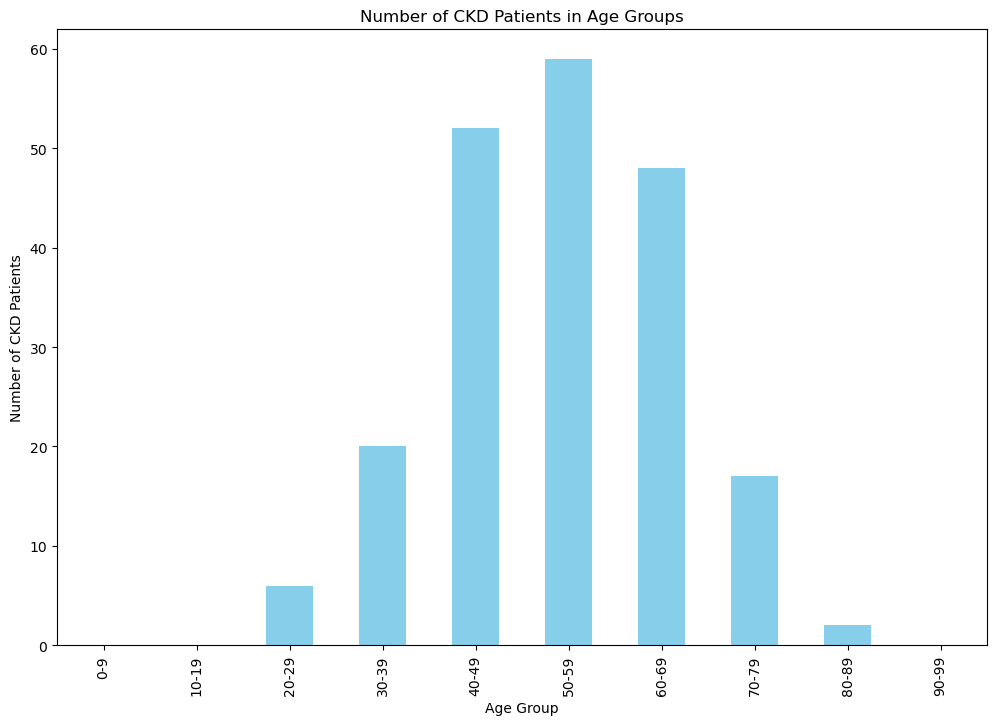

age_group
0-9       0
10-19     0
90-99     0
80-89     2
20-29     6
70-79    17
30-39    20
60-69    48
40-49    52
50-59    59
dtype: int64


In [395]:
import matplotlib.pyplot as plt
import pandas as pd

# Define age groups with a 10-year gap
age_bins = range(0, 101, 10)

# Create a new column 'age_group' based on age bins
x_1['age_group'] = pd.cut(x_1['age'], bins=age_bins, labels=[f'{i}-{i+9}' for i in age_bins[:-1]])

# Count the number of CKD patients in each age group
ckd_counts = x_1[x_1['class'] == 1].groupby('age_group').size()

# Create a bar plot
plt.figure(figsize=(12, 8))
ckd_counts.plot(kind='bar', color='skyblue')
plt.title('Number of CKD Patients in Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of CKD Patients')
plt.show()




ckd_counts_sorted = ckd_counts.sort_values(ascending=True)
print(ckd_counts_sorted)

# How gender is varying with age for x_1

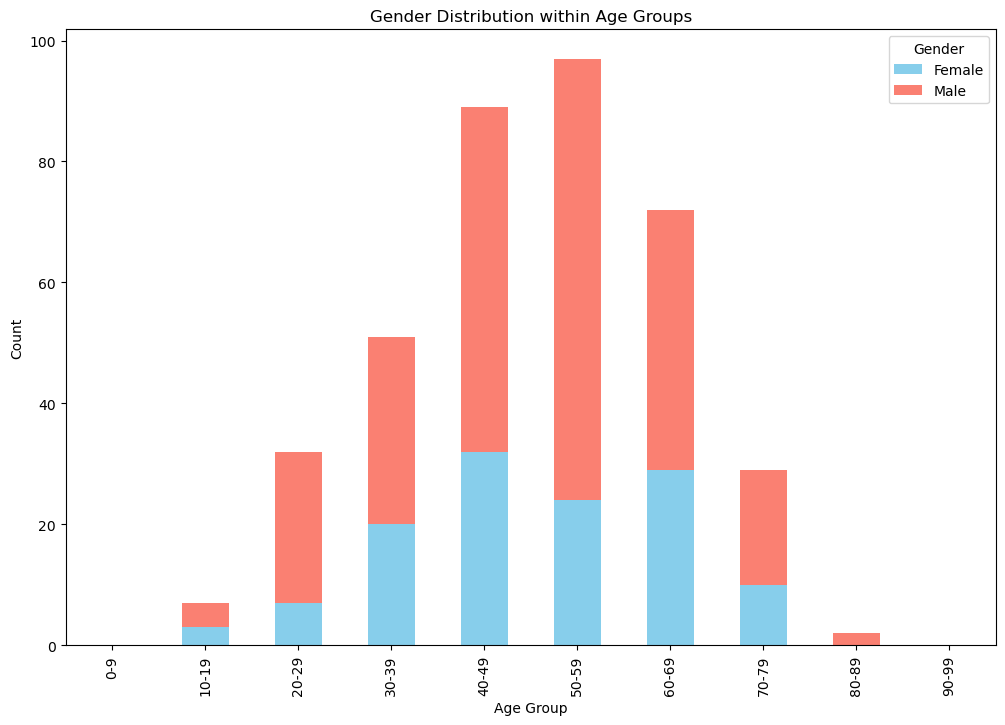

gender     0.0  1.0
age_group          
0-9          0    0
10-19        3    4
20-29        7   25
30-39       20   31
40-49       32   57
50-59       24   73
60-69       29   43
70-79       10   19
80-89        0    2
90-99        0    0


In [396]:
# Create a stacked bar plot
gender_age_counts = x_1.groupby(['age_group', 'gender']).size().unstack()
gender_age_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(12, 8))

plt.title('Gender Distribution within Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

# Display the counts in numbers
print(gender_age_counts)

# How weight is varying with ckd

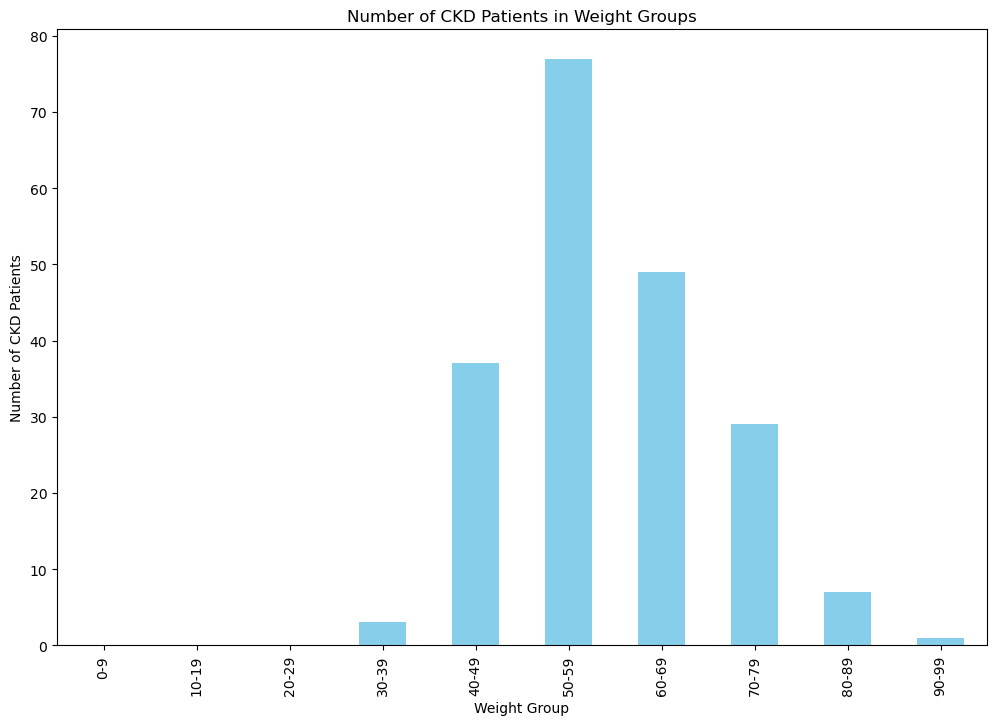

weight_group
0-9       0
10-19     0
20-29     0
90-99     1
30-39     3
80-89     7
70-79    29
40-49    37
60-69    49
50-59    77
dtype: int64


In [397]:
# Define weight groups with a 10-unit gap
weight_bins = range(0, 101, 10)

# Create a new column 'weight_group' based on weight bins
x_1['weight_group'] = pd.cut(x_1['weight'], bins=weight_bins, labels=[f'{i}-{i+9}' for i in weight_bins[:-1]])


# Count the number of CKD patients in each weight group
ckd_counts = x_1[x_1['class'] == 1].groupby('weight_group').size()

# Create a bar plot
plt.figure(figsize=(12, 8))
ckd_counts.plot(kind='bar', color='skyblue')
plt.title('Number of CKD Patients in Weight Groups')
plt.xlabel('Weight Group')
plt.ylabel('Number of CKD Patients')
plt.show()

# Display the counts in numbers
ckd_counts_sorted = ckd_counts.sort_values(ascending=True)
print(ckd_counts_sorted)


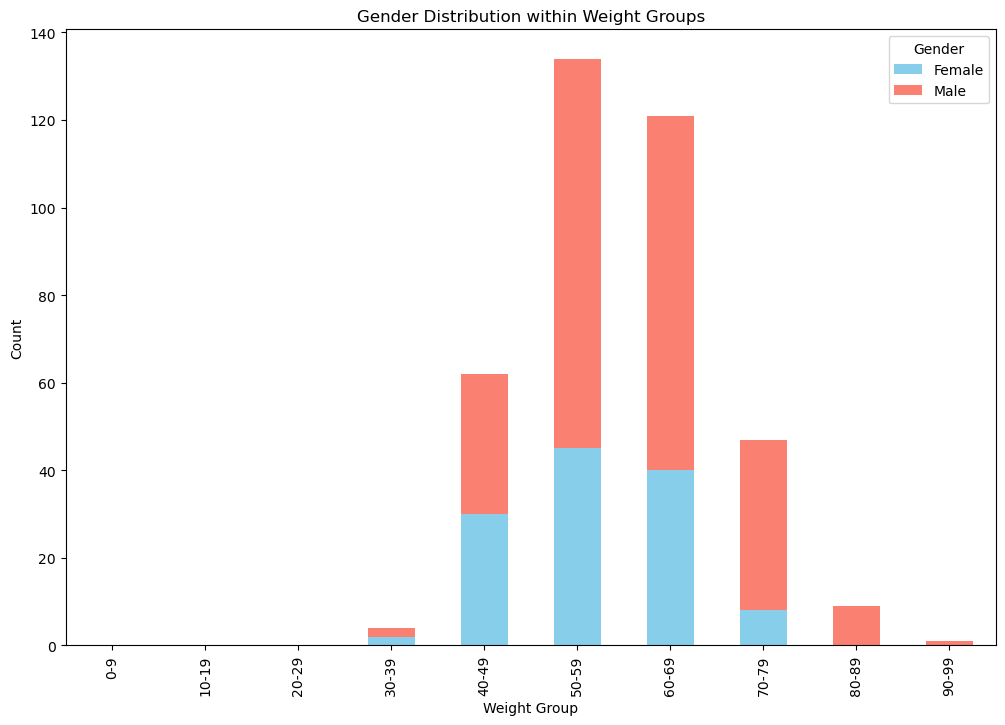

gender        0.0  1.0
weight_group          
0-9             0    0
10-19           0    0
20-29           0    0
30-39           2    2
40-49          30   32
50-59          45   89
60-69          40   81
70-79           8   39
80-89           0    9
90-99           0    1


In [398]:

# Count the number of patients in each gender within each weight group
gender_counts = x_1.groupby(['weight_group', 'gender']).size().unstack()

# Create a stacked bar plot
gender_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(12, 8))

plt.title('Gender Distribution within Weight Groups')
plt.xlabel('Weight Group')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

# Display the counts in numbers
print(gender_counts)
